In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ganes\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dx=pd.read_csv('medical_cost_insurance.csv')
dx

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df=pd.DataFrame(dx)

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


dataset has 1338 rows and 7 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Observation:
    The dataset of Medical insurance cost has:
        age: age of the insurer with zero null value and int type
        sex: Gender- male/female with zero null value and object type
        bmi: body mass index of the insurer with zero null value and float type
        children: plan covers for children or dependent with zero null value and int type
        smoker: Insurer is smoker or not
        region: location of the insurer
        charges: cost of the insurance for the plan

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Observation:
    first 5 rows considers to be age and region depends for the charges.

In [7]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Observation:
    Last five rows target values depends on age and region respectively

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

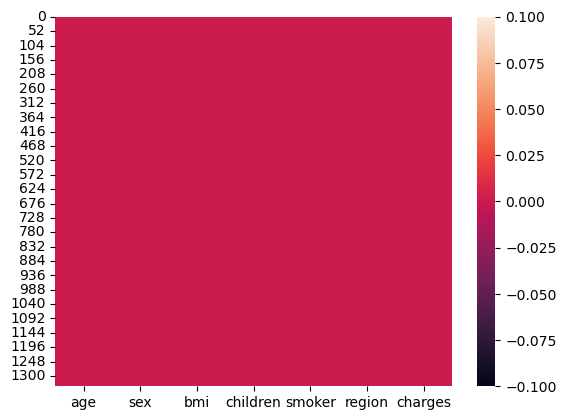

In [9]:
sns.heatmap(df.isnull())

In [10]:
cate=[]
for i in df.columns:
    if df[i].dtype=='object':
        cate.append(i)
print(cate)  
        

['sex', 'smoker', 'region']


In [11]:
num=[]
for i in df.columns:
    if df[i].dtype!='object':
        num.append(i)
print(num)

['age', 'bmi', 'children', 'charges']


In [12]:
for i in df.columns:
    dm=df[i].unique()
    print(f"unique value in column'{i}'")
    print(dm)
    print('\n')

unique value in column'age'
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]


unique value in column'sex'
['female' 'male']


unique value in column'bmi'
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27

In [13]:
df.bmi.value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [14]:
df.age.value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [15]:
df.charges.value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [16]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [19]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [20]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

# Data Visualization

# Univariate

Value count of each sex
male      676
female    662
Name: sex, dtype: int64
Value count of each smoker
no     1064
yes     274
Name: smoker, dtype: int64
Value count of each region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


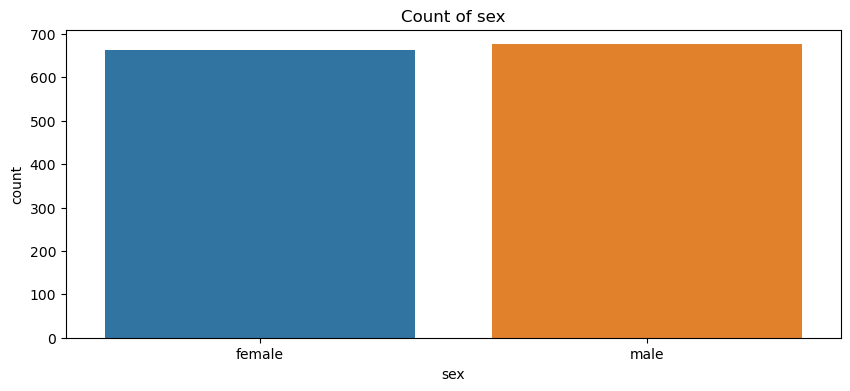

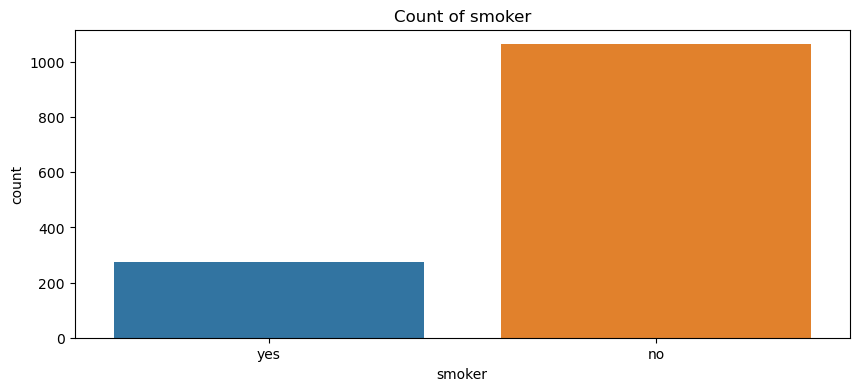

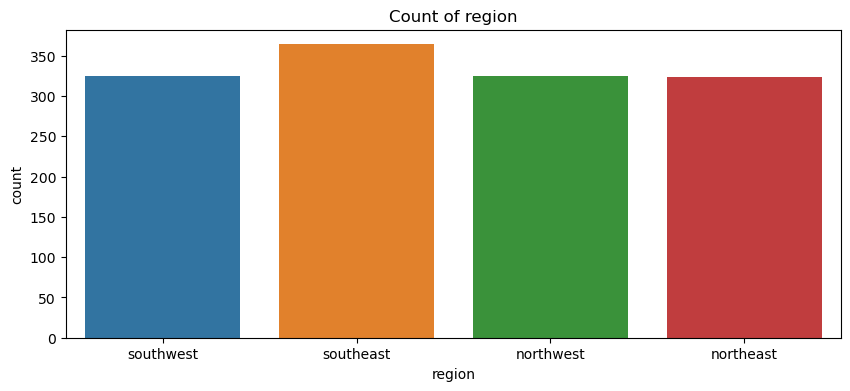

In [21]:
for feature in cate:
    value=df[feature].value_counts()  
    plt.figure(figsize=(10,4))
    print(f'Value count of each {feature}')
    print(value)
    sns.countplot(x=df[feature])
    plt.title(f'Count of {feature}')

# Observation:
    From the observation of above graphs:
        1.Insurer of gender category is almost same.
        2.Smoker is less while seeing the graphical representation of the dataset
        3.Region covers mostly ordered by: 1.southeast,southwest,northwest and northeast

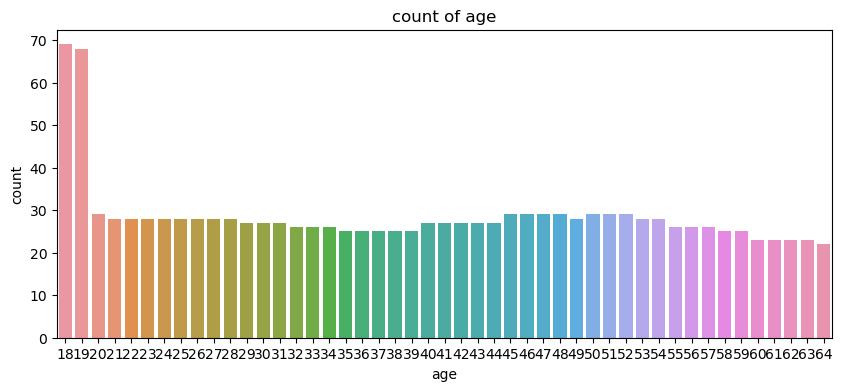

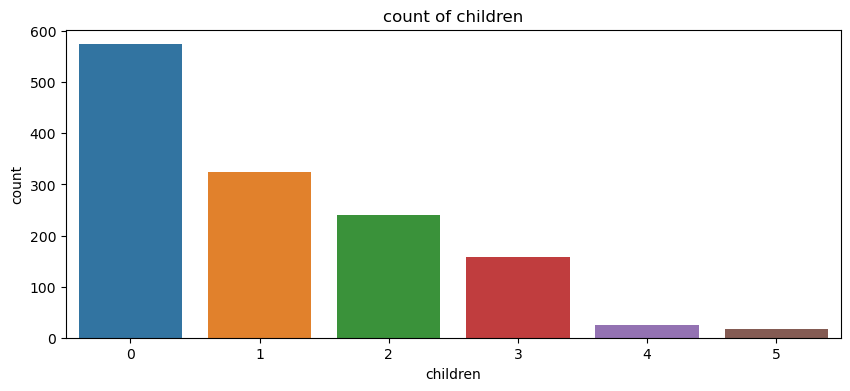

In [22]:
for i in ['age','children']:
    plt.figure(figsize=(10,4))
    sns.countplot(x=df[i])
    plt.title(f'count of {i}')

# Observation:
    1.From the count of children, most of the insurer are from the age factor of 18 and 19
    2.Children or dependent is 0 most followed by coverer of 1 and 2.

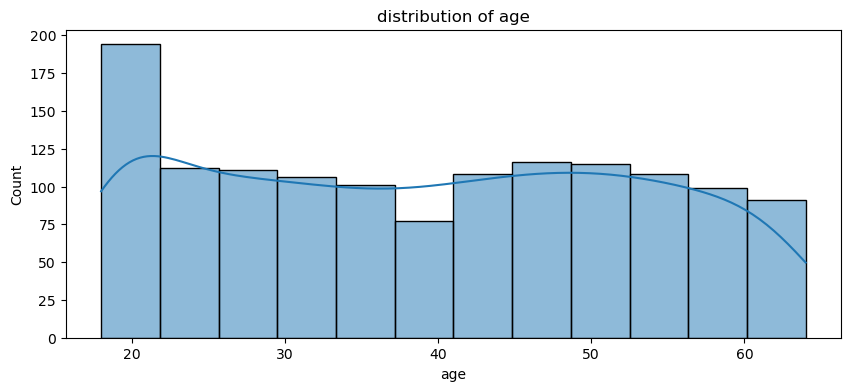

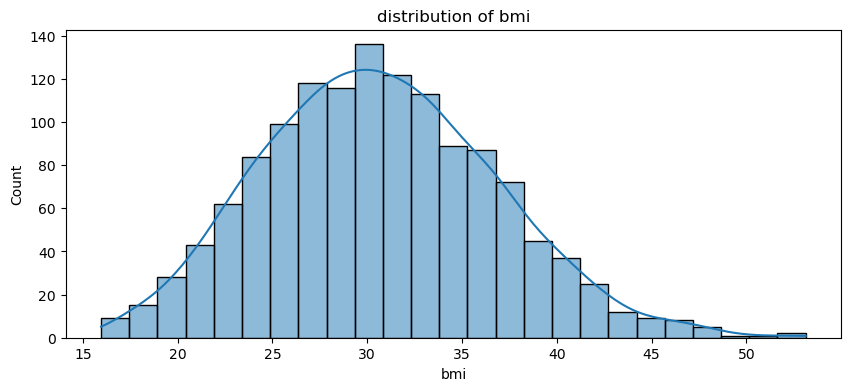

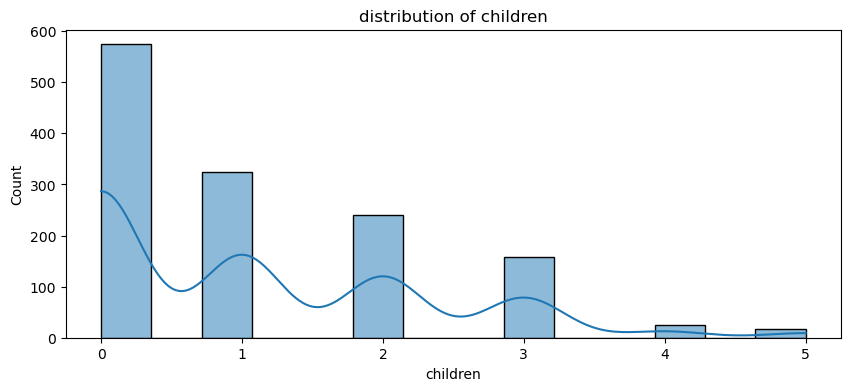

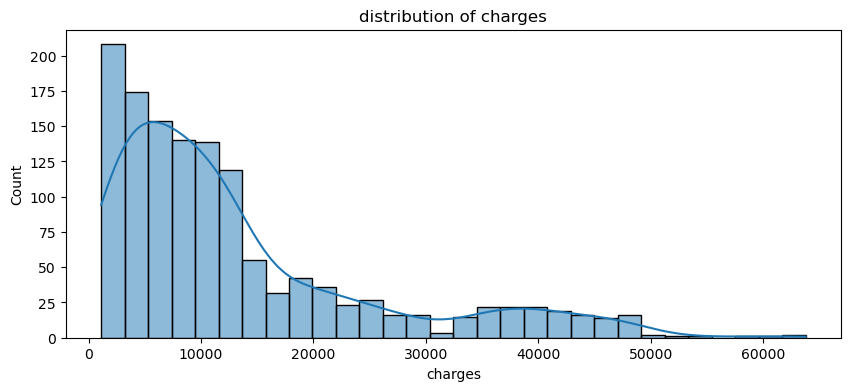

In [23]:
for i in num:
    plt.figure(figsize=(10,4))
    sns.histplot(df[i],kde=True)
    plt.title(f'distribution of {i}')
    plt.show()

age            AxesSubplot(0.125,0.53;0.133621x0.35)
bmi         AxesSubplot(0.285345,0.53;0.133621x0.35)
children     AxesSubplot(0.44569,0.53;0.133621x0.35)
charges     AxesSubplot(0.606034,0.53;0.133621x0.35)
dtype: object

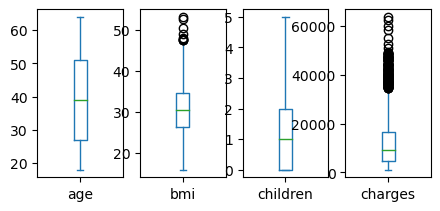

In [24]:
df.plot(kind='box',subplots=True,layout=(2,5))

In [25]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Observation:
    From the graphical representation of above numerical data:
        1.There is a right skewness present in the target variable(charges)
        2.Outliers are presents in the all numerical columns

# BiVariate:

In [26]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

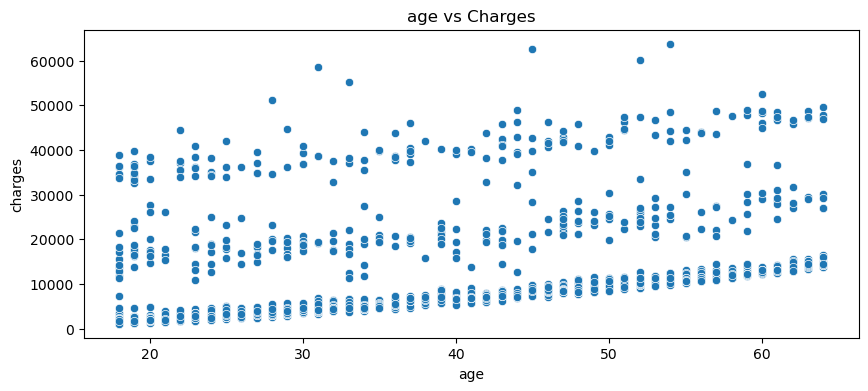

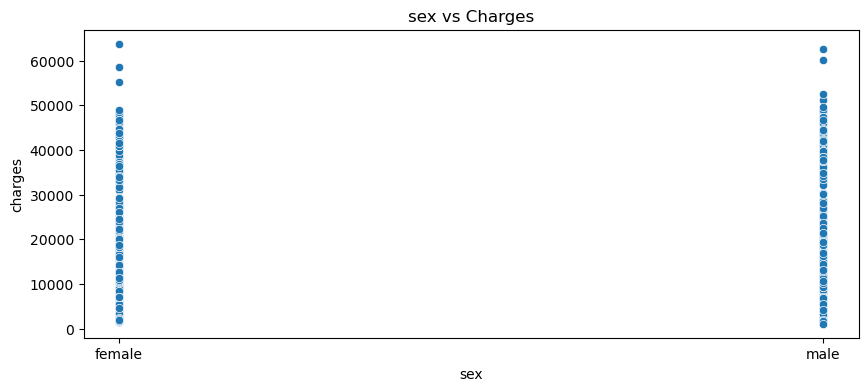

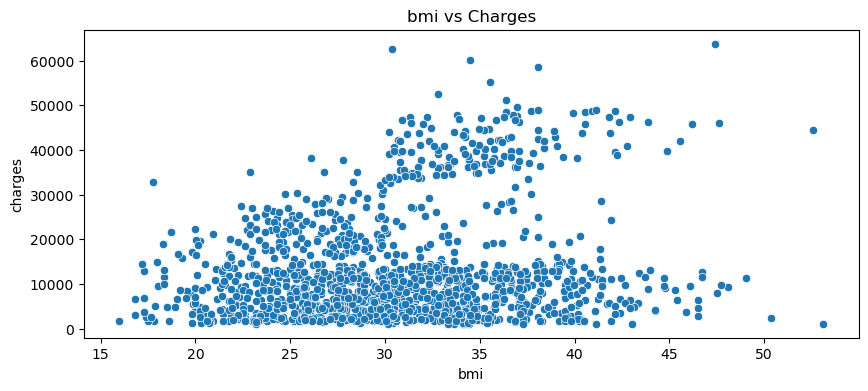

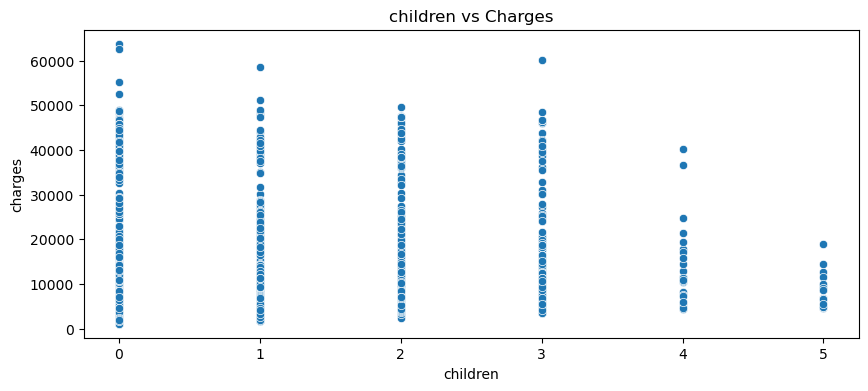

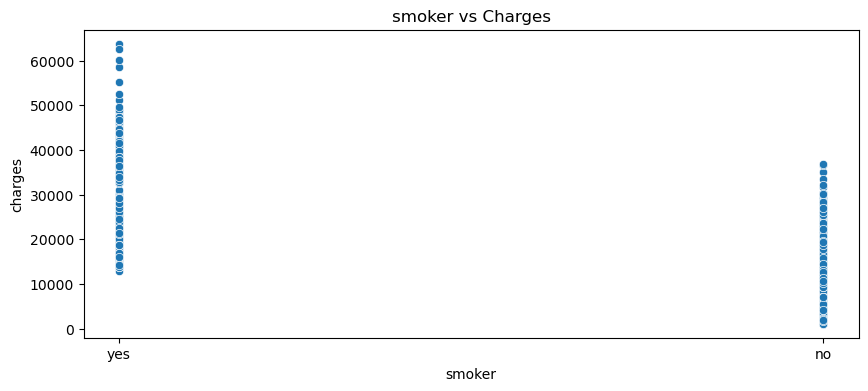

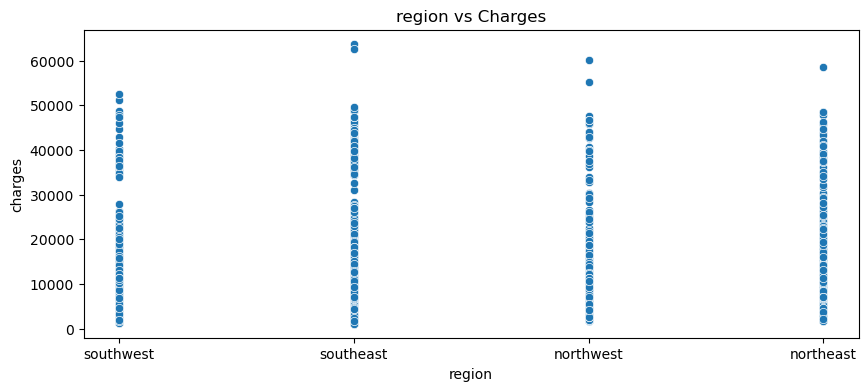

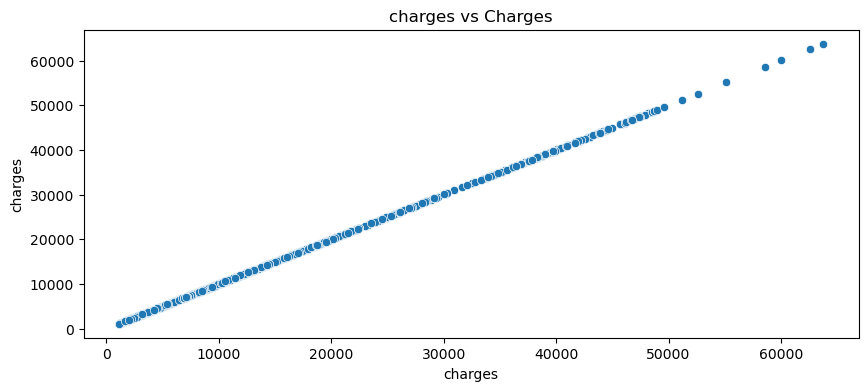

In [27]:
for i in df.columns:
    plt.figure(figsize=(10,4))
    sns.scatterplot(data=df,x=df[i],y='charges')
    plt.title(f'{i} vs Charges')
    plt.show()

# Observation:
    1.When the age is increasing the charges also increases

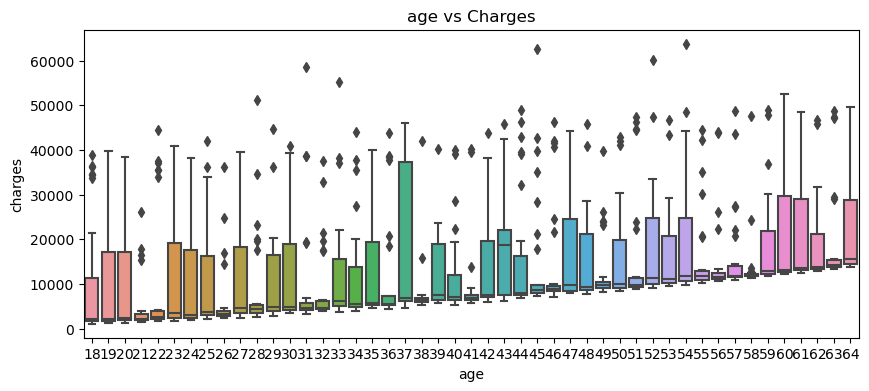

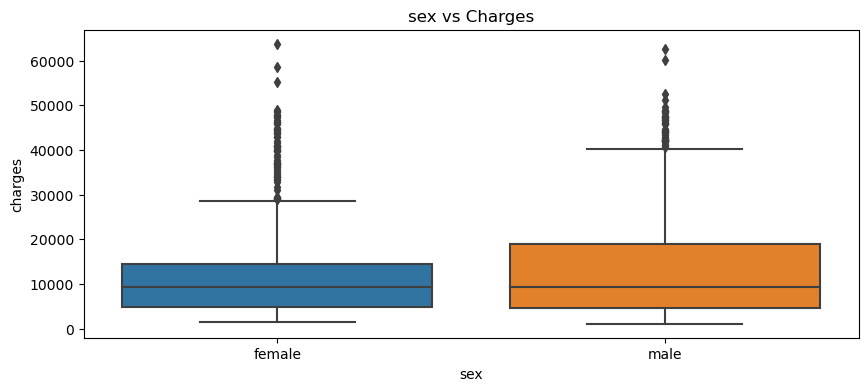

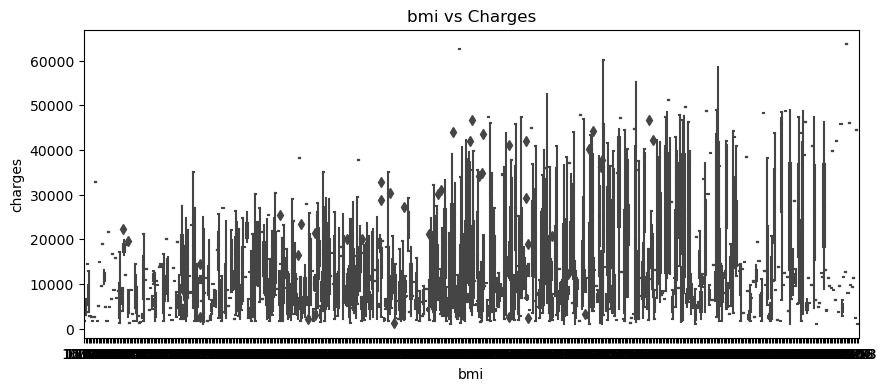

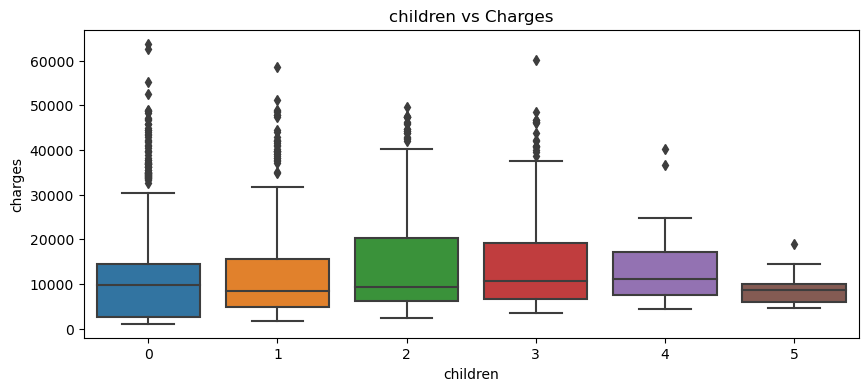

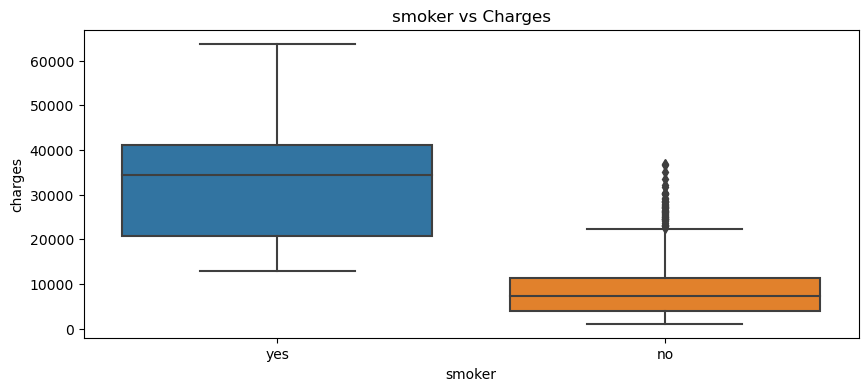

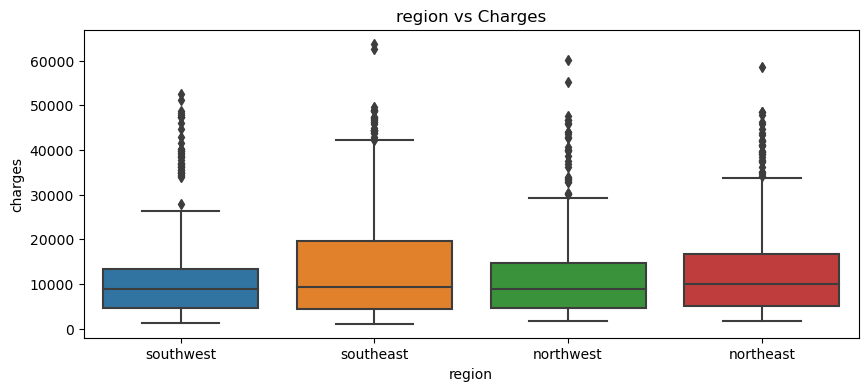

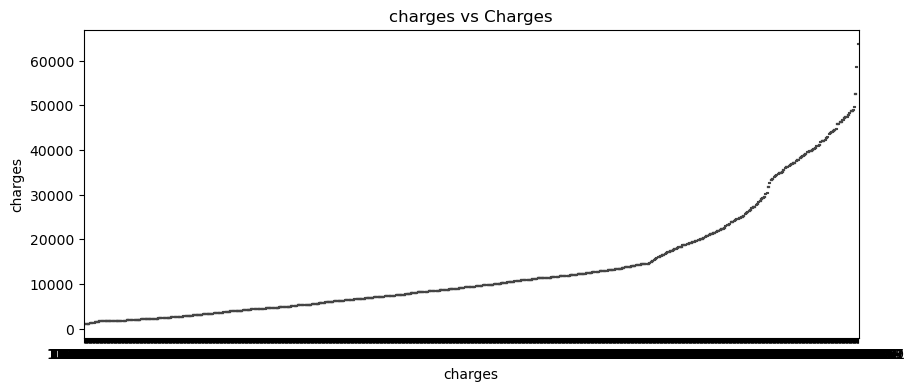

In [28]:
for i in df.columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df,x=df[i],y='charges')
    plt.title(f'{i} vs Charges')
    plt.show()

In [29]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

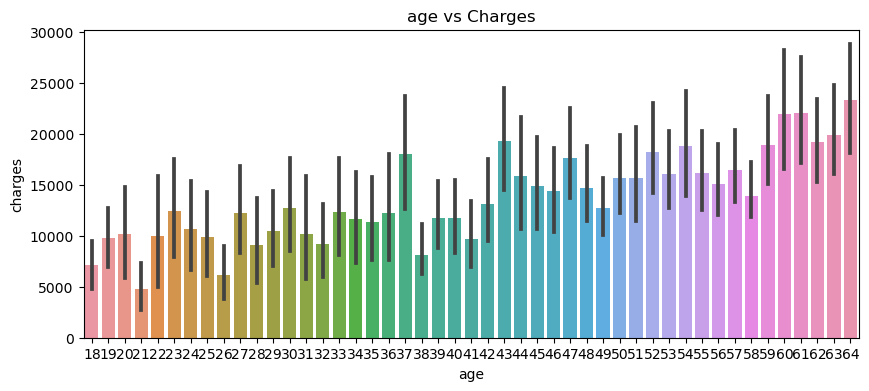

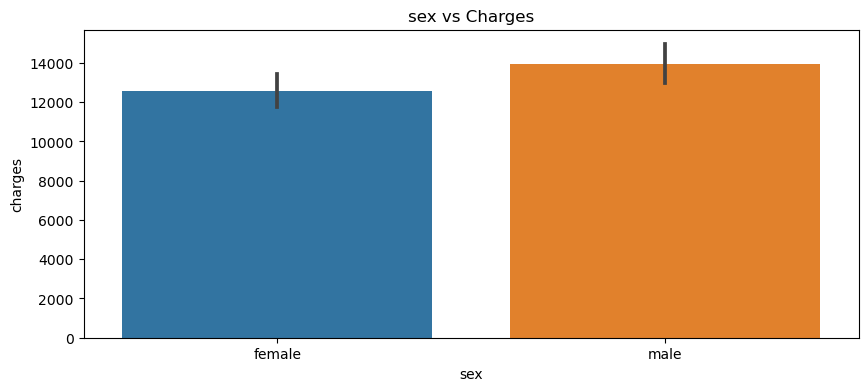

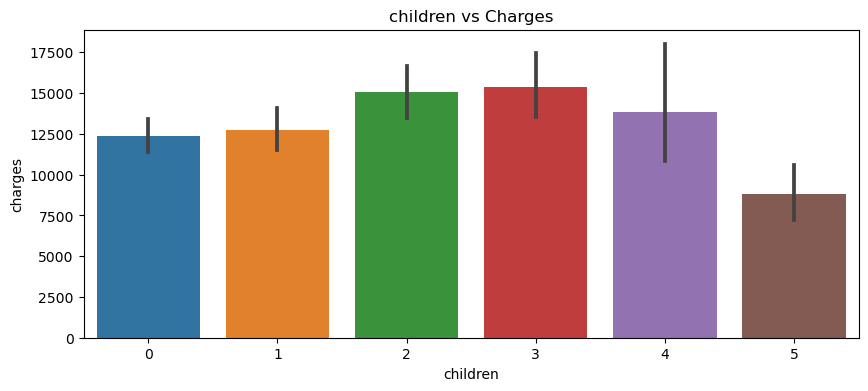

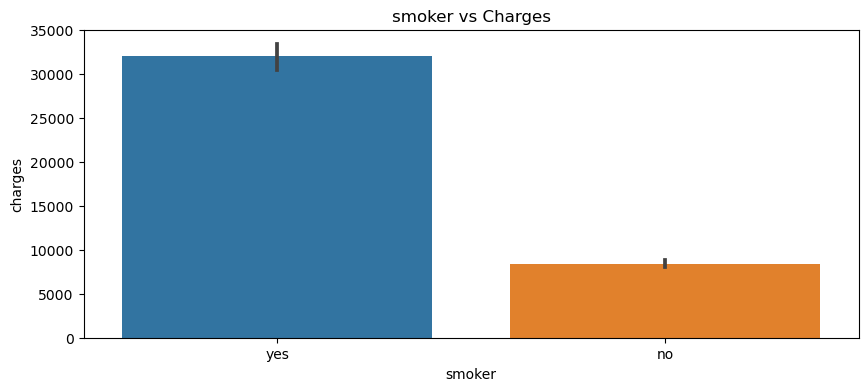

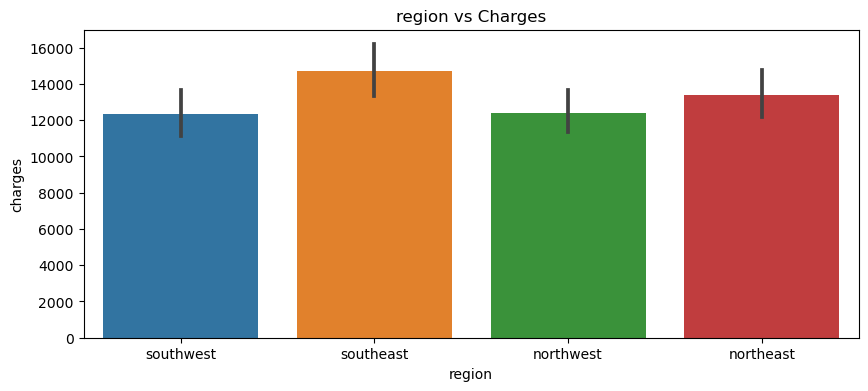

In [30]:
for i in ['age','sex','children','smoker','region']:
    plt.figure(figsize=(10,4))
    sns.barplot(data=df,x=df[i],y='charges',estimator=np.mean)
    plt.title(f'{i} vs Charges')
    plt.show()

# Observation:
    The target variable(charges)reflects in below comments:
        1.When the age is high,then the charges increases.
        2.For female insurer is charged less when compared with male insurer.
        3.When there is no smoker then the charges is less.
        4.The region of southeast charges high compared with other region category
        5.when the children is there then charges increase but in some case it is less so, target variable is not depend on it.

# male vs female with respect to children and charges

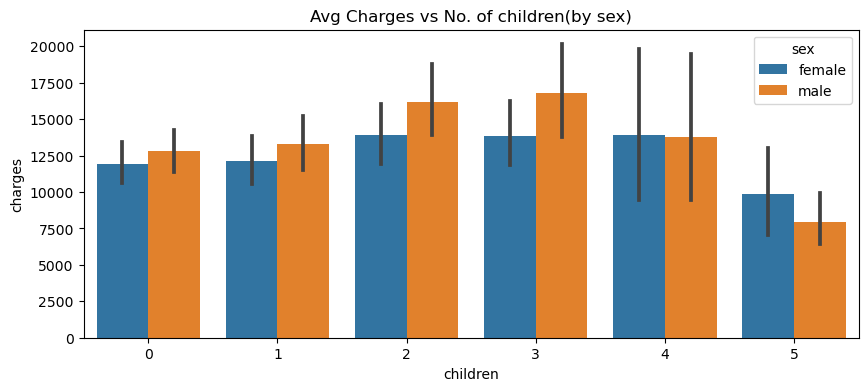

In [31]:
plt.figure(figsize=(10,4))
sns.barplot(data=df,x='children',y='charges',hue='sex',estimator=np.mean)
plt.title('Avg Charges vs No. of children(by sex)')
plt.show()

# Observation:
    From the graph its say when the male insurer covered policy with dependent is high compared with female respectively.
    But in some cases with children 4 and 5 female is charged high compared with male insurer

# BMI VS Age with respect to charges

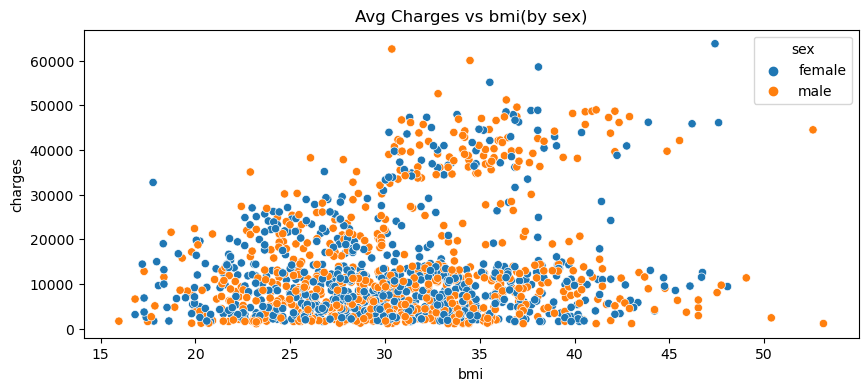

In [32]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df,x='bmi',y='charges',hue='sex',estimator=np.mean)
plt.title('Avg Charges vs bmi(by sex)')
plt.show()

# Observation:
    from the graph bmi is not depend on the charges with respect to the gender.

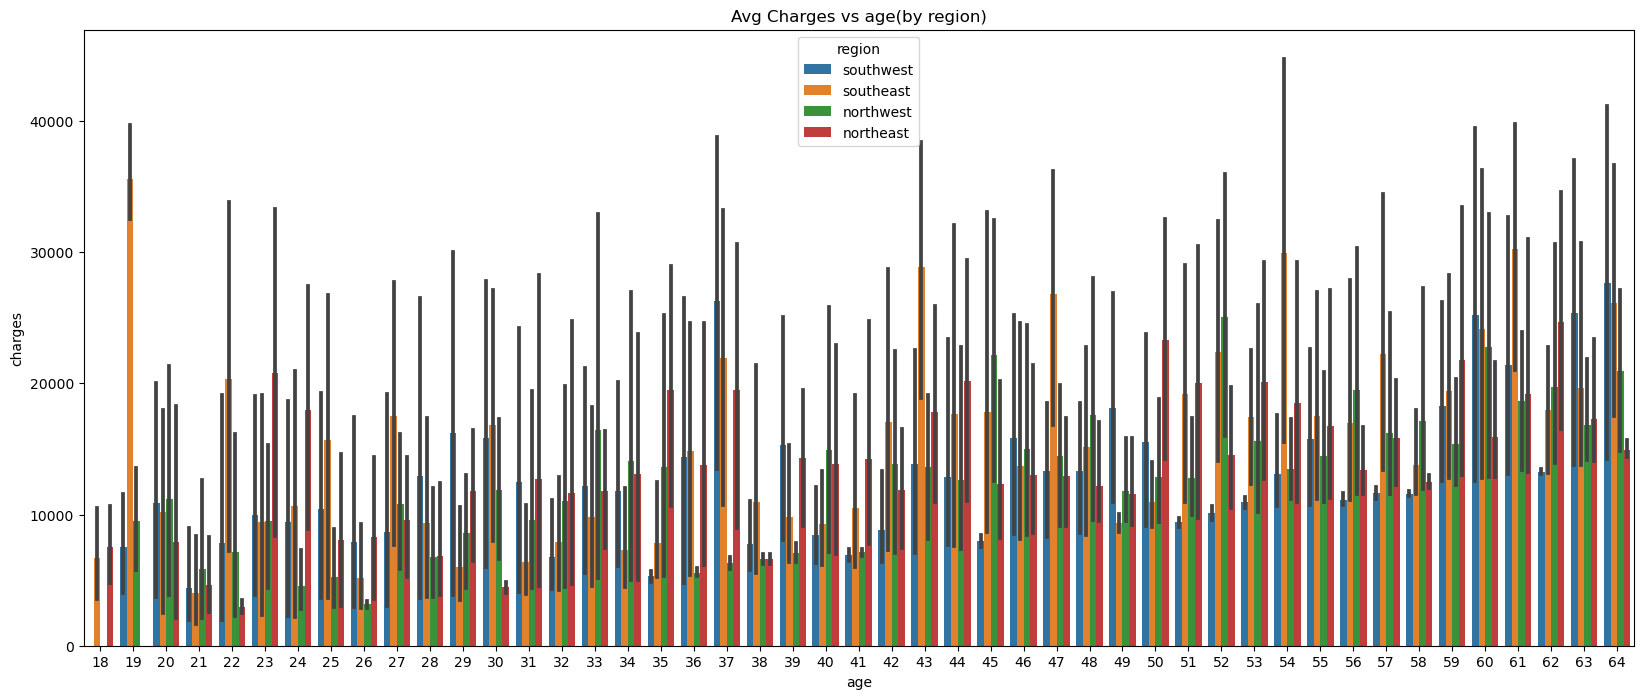

In [33]:
plt.figure(figsize=(20,8))
sns.barplot(data=df,x='age',y='charges',hue='region',estimator=np.mean)
plt.title('Avg Charges vs age(by region)')
plt.show()

# Multivariate

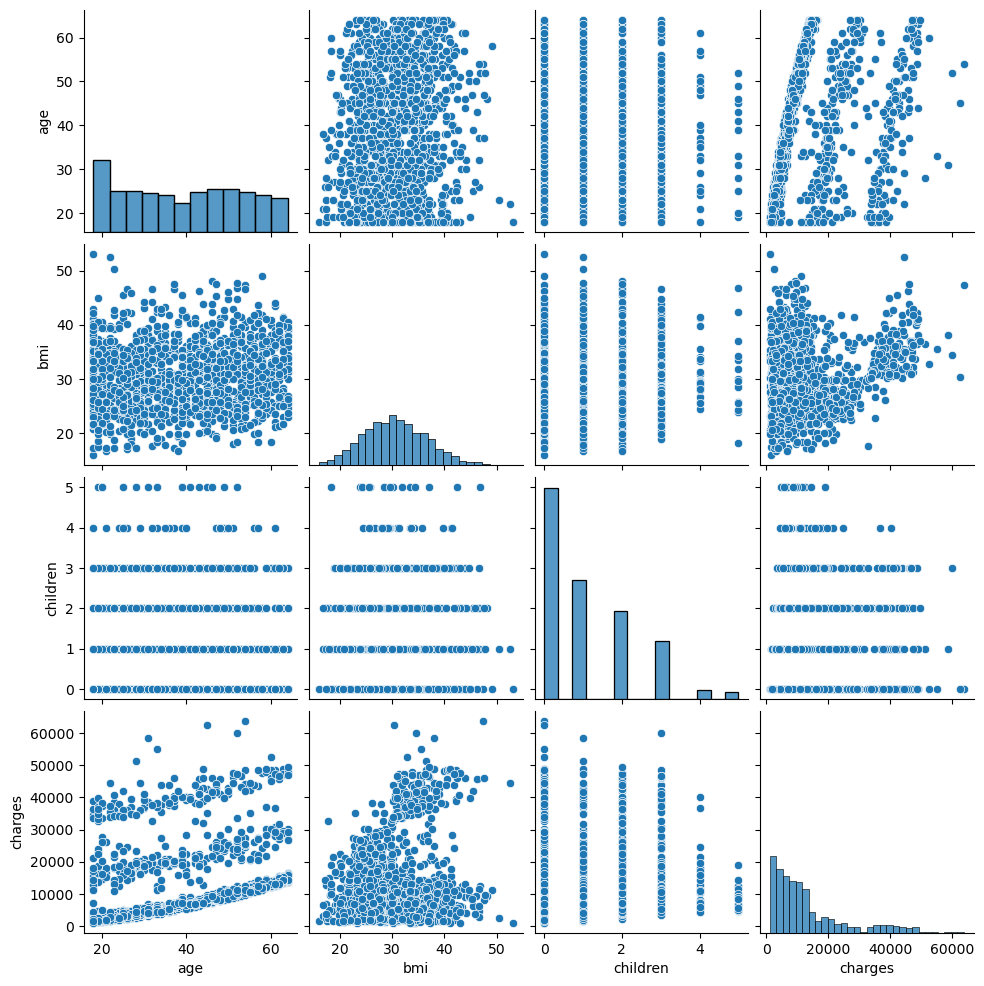

In [34]:
sns.pairplot(df)

# Labeling the object Variables

In [35]:
print(cate)

['sex', 'smoker', 'region']


In [36]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [37]:
df.sex=df.sex.map({'female':1,'male':2})

In [38]:
df.sex.unique()

array([1, 2], dtype=int64)

In [39]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [40]:
df.smoker=df.smoker.map({'no':1,'yes':2})

In [41]:
df.smoker.unique()

array([2, 1], dtype=int64)

In [42]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [43]:
df.region=df.region.map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [44]:
df.region.unique()

array([1, 2, 3, 4], dtype=int64)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


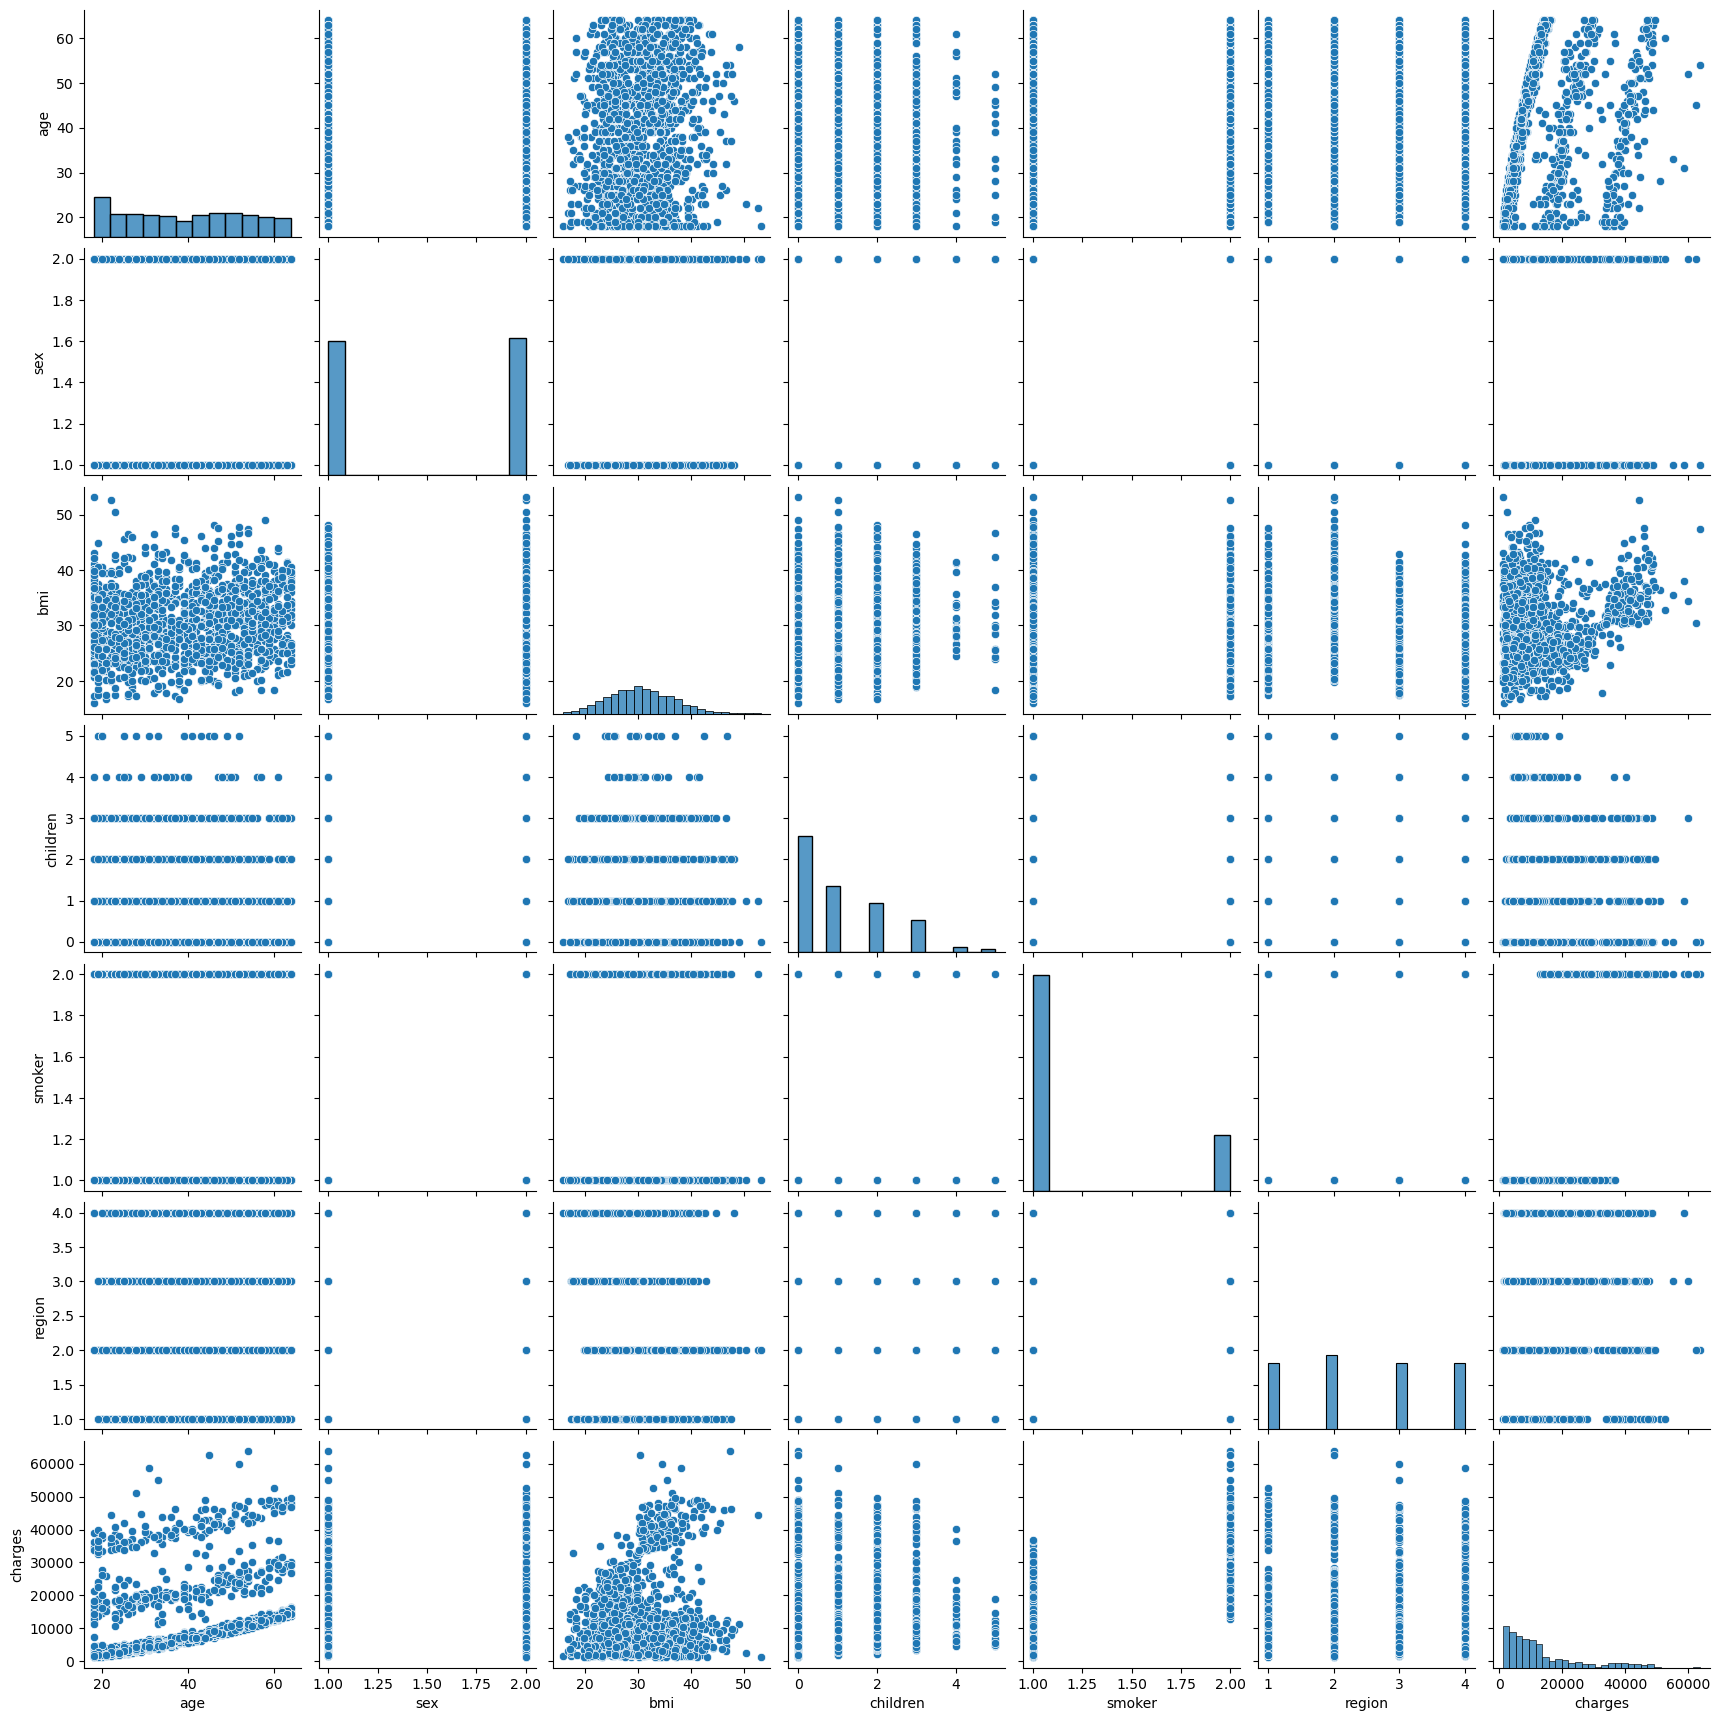

In [46]:
sns.pairplot(df)

In [47]:
df1=df

# Skew

In [48]:
df1.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region      0.038101
charges     1.515880
dtype: float64

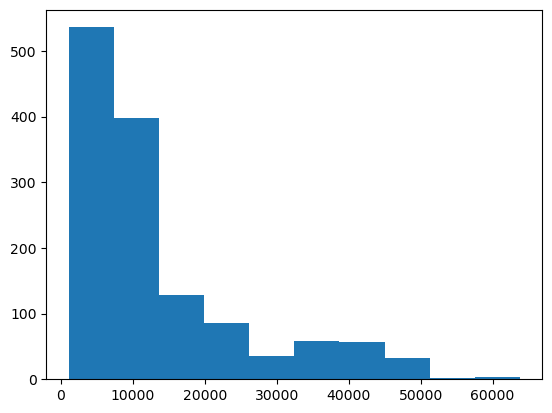

In [49]:
plt.hist('charges',data=df1)
plt.show()

In [50]:
from scipy.stats import boxcox
df['charges']=boxcox(df['charges'],0)

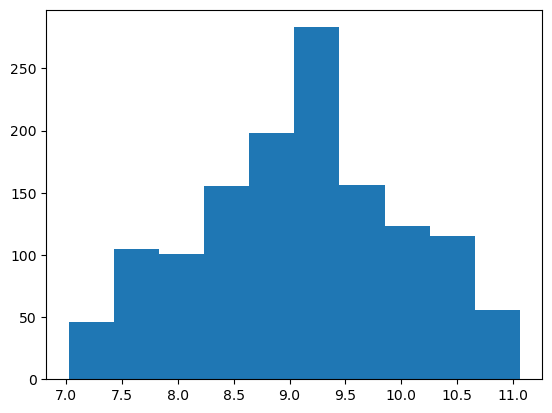

In [51]:
plt.hist('charges',data=df1)
plt.show()

In [52]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region      0.038101
charges    -0.090098
dtype: float64

# Removal of outliers

In [53]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

,age,sex,bmi,children,smoker,region,charges
0,1.438764,1.010519,0.453320,0.908614,1.970587,1.343905,0.691394
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.438495,1.790020
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.438495,0.759500
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.466915,0.978513
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.466915,0.912181
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.466915,0.184949
1334,1.509965,1.010519,0.206139,0.908614,0.507463,1.372326,1.522799
1335,1.509965,1.010519,1.014878,0.908614,0.507463,0.438495,1.852106
1336,1.296362,1.010519,0.797813,0.908614,0.507463,1.343905,1.625129


In [54]:
threshold=3
print(np.where(z>3))

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
        932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317],
      dtype=int64), array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2],
      dtype=int64))


In [55]:
z.iloc[32][3]

3.240618711442044

In [56]:
df2=df1[(z<3).all (axis=1)]

In [57]:
df1.shape

(1338, 7)

In [58]:
df2.shape

(1316, 7)

# Observation:
    Removed outliers and reduced the rows from 1338 to 1316

In [59]:
x=df2.drop(['charges'],axis=1)

In [60]:
y=df2['charges']

# Vif Checks

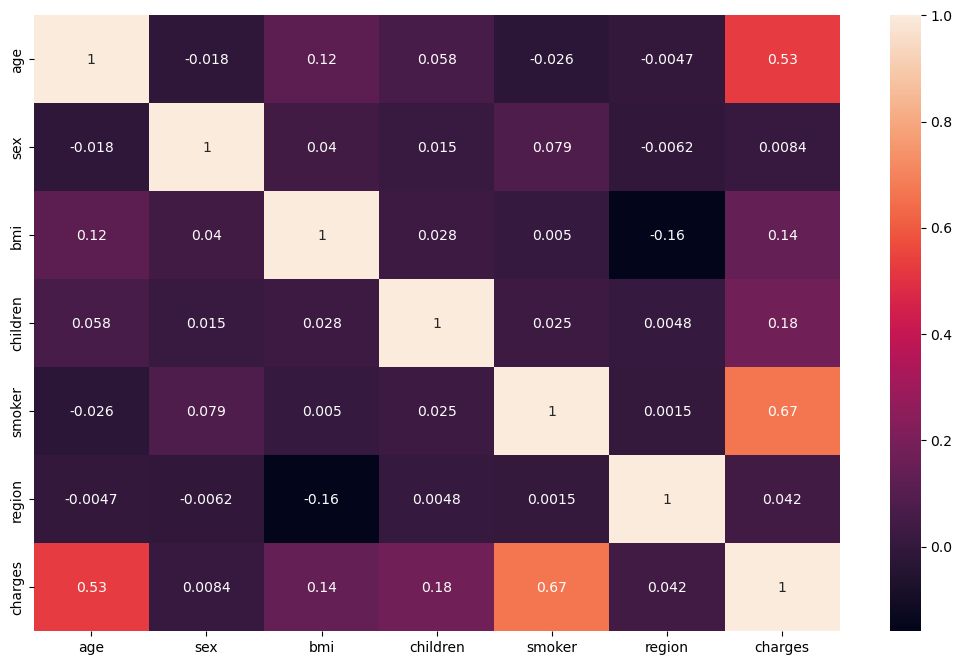

In [61]:
dfcorr=df2.corr()
plt.figure(figsize=(13,8))
sns.heatmap(dfcorr,annot=True)
plt.show()

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
def vifcheck(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['variance_inflation_factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [64]:
vifcheck(x)

  variables  variance_inflation_factor
0       age                   8.172372
1       sex                   8.921359
2       bmi                  15.581336
3  children                   1.861708
4    smoker                   8.627102
5    region                   5.236683


In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


# Scenario:1 with removing outliers and feature BMI

In [66]:
df3=df2

In [67]:
from sklearn.preprocessing import StandardScaler
std1=StandardScaler()
df3=pd.DataFrame(std1.fit_transform(df3),columns=df3.columns)

In [68]:
x1_scaled=df3.drop(['charges','bmi'],axis=1)

In [69]:
y1_scaled=df3['charges']

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1_scaled,y1_scaled,test_size=.30,random_state=i)
    #LinR=LinearRegression()
    #LinR.fit(x_train,y_train)
    #pred=LinR.predict(x_test)
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    acc=r2_score(y_test,pred)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        rmse=rmse
print(f'Best accuracy: {maxAcc}, Random_state:{maxRs},rmse:{rmse}')

Best accuracy: 0.8385671970742327, Random_state:10,rmse:0.47624219262464335


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1_scaled,y1_scaled,test_size=.30,random_state=i)
    svr=SVR()
    svr.fit(x_train,y_train)
    pred=svr.predict(x_test)
    #rfr=RandomForestRegressor()
    #rfr.fit(x_train,y_train)
    #pred=rfr.predict(x_test)
    acc=r2_score(y_test,pred)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        
print(f'Best accuracy: {maxAcc}, Random_state:{maxRs},rmse{rmse}')

Best accuracy: 0.8825873719417918, Random_state:11,rmse0.44038330756008887


In [72]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1_scaled,y1_scaled,test_size=.30,random_state=11)

# Model:LinearRegression

In [73]:
lr1=LinearRegression()
lr1.fit(x1_train,y1_train)

LinearRegression()

In [74]:
pred_lr1=lr1.predict(x1_test)

In [75]:
print('r2_score:',r2_score(y1_test,pred_lr1))
print('mean_squared_error:',mean_squared_error(y1_test,pred_lr1))
print('RMSE:',np.sqrt(mean_squared_error(y1_test,pred_lr1)))

r2_score: 0.8140027654952288
mean_squared_error: 0.19284216704401771
RMSE: 0.43913798178251184


In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
lr1_cross_score=cross_val_score(lr1,x1_scaled,y1_scaled,cv=5)
print(lr1_cross_score)
print(lr1_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y1_test,pred_lr1))-(lr1_cross_score.mean())))

[0.79093809 0.68224246 0.8244746  0.76177036 0.72635774]
0.7571566515086949
Difference between accuracy and cross val: 0.05684611398653383


# Model:RandomForestRegressor

In [78]:
rf1=RandomForestRegressor()
rf1.fit(x1_train,y1_train)

RandomForestRegressor()

In [79]:
pred_rf1=rf1.predict(x1_test)

In [80]:
print('r2_score:',r2_score(y1_test,pred_rf1))
print('mean_squared_error:',mean_squared_error(y1_test,pred_rf1))
print('RMSE:',np.sqrt(mean_squared_error(y1_test,pred_rf1)))

r2_score: 0.8212227928247036
mean_squared_error: 0.18535643361341003
RMSE: 0.4305304096267882


In [81]:
rf1_cross_score=cross_val_score(rf1,x1_scaled,y1_scaled,cv=5)
print(rf1_cross_score)
print(rf1_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y1_test,pred_rf1))-(rf1_cross_score.mean())))

[0.82179432 0.69384991 0.82202035 0.78065956 0.74300003]
0.7722648353242717
Difference between accuracy and cross val: 0.04895795750043186


# Model:ExtraTreeRegressor

In [82]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [83]:
et1=ExtraTreesRegressor()
et1.fit(x1_train,y1_train)
pred_et1=et1.predict(x1_test)

In [84]:
print('r2_score:',r2_score(y1_test,pred_et1))
print('mean_squared_error:',mean_squared_error(y1_test,pred_et1))
print('RMSE:',np.sqrt(mean_squared_error(y1_test,pred_et1)))

r2_score: 0.816807600650591
mean_squared_error: 0.18993411042155534
RMSE: 0.4358143072703733


In [85]:
et1_cross_score=cross_val_score(et1,x1_scaled,y1_scaled,cv=5)
print(et1_cross_score)
print(et1_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y1_test,pred_et1))-(et1_cross_score.mean())))

[0.78900464 0.66620791 0.7913868  0.74082343 0.71088011]
0.739660578911999
Difference between accuracy and cross val: 0.077147021738592


# Model:AdaBoostRegressor

In [86]:
ada1=AdaBoostRegressor()
ada1.fit(x1_train,y1_train)

AdaBoostRegressor()

In [87]:
pred_ada1=ada1.predict(x1_test)

In [88]:
print('r2_score:',r2_score(y1_test,pred_ada1))
print('mean_squared_error:',mean_squared_error(y1_test,pred_ada1))
print('RMSE:',np.sqrt(mean_squared_error(y1_test,pred_ada1)))

r2_score: 0.7678233264481746
mean_squared_error: 0.24072106762241638
RMSE: 0.49063333317500596


In [89]:
ada1_cross_score=cross_val_score(ada1,x1_scaled,y1_scaled,cv=5)
print(ada1_cross_score)
print(ada1_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y1_test,pred_ada1))-(ada1_cross_score.mean())))

[0.77728902 0.6367701  0.77064023 0.70510644 0.75523738]
0.7290086335783028
Difference between accuracy and cross val: 0.038814692869871825


# Model:GradientBoostingRegressor

In [90]:
gbc1=GradientBoostingRegressor()

In [91]:
gbc1.fit(x1_train,y1_train)
pred_gbc1=gbc1.predict(x1_test)

In [92]:
print('r2_score:',r2_score(y1_test,pred_gbc1))
print('mean_squared_error:',mean_squared_error(y1_test,pred_gbc1))
print('RMSE:',np.sqrt(mean_squared_error(y1_test,pred_gbc1)))

r2_score: 0.8638639943772649
mean_squared_error: 0.14114598212658575
RMSE: 0.37569400065290603


In [93]:
gbc1_cross_score=cross_val_score(gbc1,x1_scaled,y1_scaled,cv=5)
print(gbc1_cross_score)
print(gbc1_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y1_test,pred_gbc1))-(gbc1_cross_score.mean())))

[0.85783629 0.70964087 0.86795497 0.81131608 0.78500403]
0.8063504486025975
Difference between accuracy and cross val: 0.057513545774667385


# Model:KNN

In [94]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [95]:
knn1=KNeighborsRegressor()
knn1.fit(x1_train,y1_train)

KNeighborsRegressor()

In [96]:
pred_knn1=knn1.predict(x1_test)

In [97]:
print('r2_score:',r2_score(y1_test,pred_knn1))
print('mean_squared_error:',mean_squared_error(y1_test,pred_knn1))
print('RMSE:',np.sqrt(mean_squared_error(y1_test,pred_knn1)))

r2_score: 0.8384821423049569
mean_squared_error: 0.16746191832986848
RMSE: 0.4092211117841655


In [98]:
knn1_cross_score=cross_val_score(knn1,x1_scaled,y1_scaled,cv=5)
print(knn1_cross_score)
print(knn1_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y1_test,pred_knn1))-(knn1_cross_score.mean())))

[0.820421   0.69023905 0.83780476 0.77651951 0.775377  ]
0.7800722641089826
Difference between accuracy and cross val: 0.05840987819597432


# Model:DecisionTressRegressor

In [99]:
dt1=DecisionTreeRegressor()
dt1.fit(x1_train,y1_train)

DecisionTreeRegressor()

In [100]:
pred_dt1=dt1.predict(x1_test)

In [101]:
print('r2_score:',r2_score(y1_test,pred_dt1))
print('mean_squared_error:',mean_squared_error(y1_test,pred_dt1))
print('RMSE:',np.sqrt(mean_squared_error(y1_test,pred_dt1)))

r2_score: 0.7006307415383587
mean_squared_error: 0.3103864243025754
RMSE: 0.5571233474757411


In [102]:
dt1_cross_score=cross_val_score(dt1,x1_scaled,y1_scaled,cv=5)
print(dt1_cross_score)
print(dt1_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y1_test,pred_dt1))-(dt1_cross_score.mean())))

[0.74679091 0.63907203 0.65948928 0.68224764 0.62123263]
0.6697664970359202
Difference between accuracy and cross val: 0.03086424450243852


# Model:SVM

In [103]:
svr1=SVR()

In [104]:
svr1.fit(x_train,y_train)

SVR()

In [105]:
pred_svr1=svr1.predict(x1_test)

In [106]:
print('r2_score:',r2_score(y1_test,pred_svr1))
print('mean_squared_error:',mean_squared_error(y1_test,pred_svr1))
print('RMSE:',np.sqrt(mean_squared_error(y1_test,pred_svr1)))

r2_score: 0.8933291606052314
mean_squared_error: 0.1105964606627733
RMSE: 0.33256046166490283


In [107]:
svr1_cross_score=cross_val_score(svr1,x1_scaled,y1_scaled,cv=5)
print(svr1_cross_score)
print(svr1_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y1_test,pred_svr1))-(svr1_cross_score.mean())))

[0.8611615  0.69917586 0.87648278 0.80427344 0.77859858]
0.8039384326727568
Difference between accuracy and cross val: 0.0893907279324746


# Model:SVM(linear)

In [108]:
svlin1=SVR(kernel='linear')
svlin1.fit(x1_train,y1_train)

SVR(kernel='linear')

In [109]:
pred_lin1=svlin1.predict(x1_test)

In [110]:
print('r2_score:',r2_score(y1_test,pred_lin1))
print('mean_squared_error:',mean_squared_error(y1_test,pred_lin1))
print('RMSE:',np.sqrt(mean_squared_error(y1_test,pred_lin1)))

r2_score: 0.8143365929392651
mean_squared_error: 0.1924960543295027
RMSE: 0.43874372283772073


In [111]:
lin1_cross_score=cross_val_score(svlin1,x1_scaled,y1_scaled,cv=5)
print(lin1_cross_score)
print(lin1_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y1_test,pred_lin1))-(lin1_cross_score.mean())))

[0.78366726 0.6552329  0.8275863  0.74835464 0.68077027]
0.7391222751459162
Difference between accuracy and cross val: 0.07521431779334886


# Model:SVM(poly)

In [112]:
sv_poly1=SVR(kernel='poly')
sv_poly1.fit(x1_train,y1_train)

SVR(kernel='poly')

In [113]:
pred_poly1=sv_poly1.predict(x1_test)

In [114]:
print('r2_score:',r2_score(y1_test,pred_poly1))
print('mean_squared_error:',mean_squared_error(y1_test,pred_poly1))
print('RMSE:',np.sqrt(mean_squared_error(y1_test,pred_poly1)))

r2_score: 0.8710796436191469
mean_squared_error: 0.13366478790270953
RMSE: 0.36560195281577684


In [115]:
poly1_cross_score=cross_val_score(sv_poly1,x1_scaled,y1_scaled,cv=5)
print(poly1_cross_score)
print(poly1_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y1_test,pred_poly1))-(poly1_cross_score.mean())))

[0.84582438 0.68427876 0.86416671 0.78376007 0.76450544]
0.7885070731821198
Difference between accuracy and cross val: 0.08257257043702715


# Scenario:2 Without removing Outliers

In [116]:
df4=df1

In [117]:
std2=StandardScaler()
df4_scaled=pd.DataFrame(std2.fit_transform(df4),columns=df3.columns)

In [118]:
x2=df4_scaled.drop(['charges'],axis=1)

In [119]:
y2=df4_scaled['charges']

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=.30,random_state=i)
    LinR=LinearRegression()
    LinR.fit(x_train,y_train)
    pred=LinR.predict(x_test)
    #rfr=RandomForestRegressor()
    #rfr.fit(x_train,y_train)
    #pred=rfr.predict(x_test)
    acc=r2_score(y_test,pred)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        
print(f'Best accuracy: {maxAcc}, Random_state:{maxRs},rmse{rmse}')

Best accuracy: 0.8215310272565298, Random_state:134,rmse0.4806480993608959


In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=.30,random_state=i)
    #LinR=LinearRegression()
    #LinR.fit(x_train,y_train)
    #pred=LinR.predict(x_test)
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    acc=r2_score(y_test,pred)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        rmse=rmse
print(f'Best accuracy: {maxAcc}, Random_state:{maxRs},rmse:{rmse}')

Best accuracy: 0.8781686542421531, Random_state:134,rmse:0.4444431168832434


In [122]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=.30,random_state=134)

# Model:LinearRegression

In [123]:
lr2=LinearRegression()
lr2.fit(x2_train,y2_train)

LinearRegression()

In [124]:
pred_lr2=lr2.predict(x2_test)

In [125]:
print('r2_score:',r2_score(y2_test,pred_lr2))
print('mean_squared_error:',mean_squared_error(y2_test,pred_lr2))
print('RMSE:',np.sqrt(mean_squared_error(y2_test,pred_lr2)))

r2_score: 0.8215310272565298
mean_squared_error: 0.18248929279421922
RMSE: 0.42718765524558316


In [126]:
lr2_cross_score=cross_val_score(lr2,x2,y2,cv=5)
print(lr2_cross_score)
print(lr2_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y2_test,pred_lr2))-(lr2_cross_score.mean())))

[0.7983702  0.68785391 0.83136355 0.76679168 0.73241097]
0.763358062047066
Difference between accuracy and cross val: 0.0581729652094638


# Model:RandomForestRegressor

In [127]:
rf2=RandomForestRegressor()
rf2.fit(x2_train,y2_train)

RandomForestRegressor()

In [128]:
pred_rf2=rf2.predict(x2_test)

In [129]:
print('r2_score:',r2_score(y2_test,pred_rf2))
print('mean_squared_error:',mean_squared_error(y2_test,pred_rf2))
print('RMSE:',np.sqrt(mean_squared_error(y2_test,pred_rf2)))

r2_score: 0.8820415612790151
mean_squared_error: 0.1206156550934167
RMSE: 0.3472976462537814


In [130]:
rf2_cross_score=cross_val_score(rf2,x2,y2,cv=5)
print(rf2_cross_score)
print(rf2_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y2_test,pred_rf2))-(rf2_cross_score.mean())))

[0.84926284 0.71107422 0.87088136 0.82058101 0.79408415]
0.8091767142187116
Difference between accuracy and cross val: 0.0728648470603035


# Model:ExtreeTreesRegressor

In [131]:
et2=ExtraTreesRegressor()
et2.fit(x2_train,y2_train)

ExtraTreesRegressor()

In [132]:
pred_et2=et2.predict(x2_test)

In [133]:
print('r2_score:',r2_score(y2_test,pred_et2))
print('mean_squared_error:',mean_squared_error(y2_test,pred_et2))
print('RMSE:',np.sqrt(mean_squared_error(y2_test,pred_et2)))

r2_score: 0.8470398308817004
mean_squared_error: 0.15640585956756428
RMSE: 0.3954818068730397


In [134]:
et2_cross_score=cross_val_score(et2,x2,y2,cv=5)
print(et2_cross_score)
print(et2_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y2_test,pred_et2))-(et2_cross_score.mean())))

[0.81383779 0.67042753 0.85588801 0.79675649 0.7734637 ]
0.7820747034729376
Difference between accuracy and cross val: 0.06496512740876281


# Model:AdaBoostRegressor

In [135]:
ada2=AdaBoostRegressor()
ada2.fit(x2_train,y2_train)

AdaBoostRegressor()

In [136]:
pred_ada2=ada2.predict(x2_test)

In [137]:
print('r2_score:',r2_score(y2_test,pred_ada2))
print('mean_squared_error:',mean_squared_error(y2_test,pred_ada2))
print('RMSE:',np.sqrt(mean_squared_error(y2_test,pred_ada2)))

r2_score: 0.7756621815881267
mean_squared_error: 0.2293914129702896
RMSE: 0.4789482362116908


In [138]:
ada2_cross_score=cross_val_score(ada2,x2,y2,cv=5)
print(ada2_cross_score)
print(ada2_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y2_test,pred_ada2))-(ada2_cross_score.mean())))

[0.71516082 0.66249471 0.73247803 0.71591486 0.72328663]
0.7098670086274658
Difference between accuracy and cross val: 0.06579517296066095


# Model:GradientBoostinRegressor

In [139]:
gbc2=GradientBoostingRegressor()
gbc2.fit(x2_train,y2_train)

GradientBoostingRegressor()

In [140]:
pred_gbc2=gbc2.predict(x2_test)

In [141]:
print('r2_score:',r2_score(y2_test,pred_gbc2))
print('mean_squared_error:',mean_squared_error(y2_test,pred_gbc2))
print('RMSE:',np.sqrt(mean_squared_error(y2_test,pred_gbc2)))

r2_score: 0.9067003177937272
mean_squared_error: 0.0954014177479546
RMSE: 0.3088711992853244


In [142]:
gbc2_cross_score=cross_val_score(gbc2,x2,y2,cv=5)
print(gbc2_cross_score)
print(gbc2_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y2_test,pred_gbc2))-(gbc2_cross_score.mean())))

[0.87269964 0.73064219 0.90244691 0.84211769 0.80205617]
0.829992521716022
Difference between accuracy and cross val: 0.07670779607770517


In [143]:
dt2=DecisionTreeRegressor()
dt2.fit(x2_train,y2_train)

DecisionTreeRegressor()

In [144]:
pred_dt2=dt2.predict(x2_test)

In [145]:
print('r2_score:',r2_score(y2_test,pred_dt2))
print('mean_squared_error:',mean_squared_error(y2_test,pred_dt2))
print('RMSE:',np.sqrt(mean_squared_error(y2_test,pred_dt2)))

r2_score: 0.6789080491963608
mean_squared_error: 0.3283250983256206
RMSE: 0.5729965953874601


In [146]:
gbc2_cross_score=cross_val_score(gbc2,x2,y2,cv=5)
print(gbc2_cross_score)
print(gbc2_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y2_test,pred_gbc2))-(gbc2_cross_score.mean())))

[0.87276715 0.73063799 0.90243238 0.84211437 0.80205617]
0.8300016140046325
Difference between accuracy and cross val: 0.07669870378909471


# Model:KNN

In [147]:
knn2=KNeighborsRegressor()
knn2.fit(x2_train,y2_train)

KNeighborsRegressor()

In [148]:
pred_knn2=knn2.predict(x2_test)

In [149]:
print('r2_score:',r2_score(y2_test,pred_knn2))
print('mean_squared_error:',mean_squared_error(y2_test,pred_knn2))
print('RMSE:',np.sqrt(mean_squared_error(y2_test,pred_knn2)))

r2_score: 0.8615350079304508
mean_squared_error: 0.14158415376688344
RMSE: 0.3762766984107353


In [150]:
knn2_cross_score=cross_val_score(knn2,x2,y2,cv=5)
print(knn2_cross_score)
print(knn2_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y2_test,pred_knn2))-(knn2_cross_score.mean())))

[0.84944493 0.69046591 0.84883996 0.81502131 0.78609463]
0.7979733476970592
Difference between accuracy and cross val: 0.0635616602333916


# Model:SVM

In [151]:
svr2=SVR()
svr2.fit(x2_train,y2_train)

SVR()

In [152]:
pred_svr2=svr2.predict(x2_test)

In [153]:
print('r2_score:',r2_score(y2_test,pred_svr2))
print('mean_squared_error:',mean_squared_error(y2_test,pred_svr2))
print('RMSE:',np.sqrt(mean_squared_error(y2_test,pred_svr2)))

r2_score: 0.9161377610372863
mean_squared_error: 0.0857513798907961
RMSE: 0.2928333653988153


In [154]:
svr2_cross_score=cross_val_score(svr2,x2,y2,cv=5)
print(svr2_cross_score)
print(svr2_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y2_test,pred_svr2))-(svr2_cross_score.mean())))

[0.89380462 0.71765249 0.91143973 0.83280459 0.80061251]
0.8312627867319439
Difference between accuracy and cross val: 0.08487497430534241


# scenario:3 Without removing skew in target variable and outliers

In [155]:
df5=df

In [156]:
std3=StandardScaler()
df5_scaled=pd.DataFrame(std3.fit_transform(df5),columns=df5.columns)

In [157]:
df5_scaled.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [158]:
x4=df5_scaled.drop(['charges'],axis=1)

In [159]:
y4=df5_scaled['charges']

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x4,y4,test_size=.30,random_state=i)
    LinR=LinearRegression()
    LinR.fit(x_train,y_train)
    pred=LinR.predict(x_test)
    #rfr=RandomForestRegressor()
    #rfr.fit(x_train,y_train)
    #pred=rfr.predict(x_test)
    acc=r2_score(y_test,pred)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        
print(f'Best accuracy: {maxAcc}, Random_state:{maxRs},rmse{rmse}')

Best accuracy: 0.8215310272565298, Random_state:134,rmse0.4806480993608959


In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

maxAcc=0
maxRs=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x4,y4,test_size=.30,random_state=i)
    #LinR=LinearRegression()
    #LinR.fit(x_train,y_train)
    #pred=LinR.predict(x_test)
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    acc=r2_score(y_test,pred)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        rmse=rmse
print(f'Best accuracy: {maxAcc}, Random_state:{maxRs},rmse:{rmse}')

Best accuracy: 0.8862839683622309, Random_state:134,rmse:0.42427082397803445


In [162]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x4,y4,test_size=.30,random_state=134)

# Model:LinearRegression

In [163]:
lr3=LinearRegression()
lr3.fit(x3_train,y3_train)

LinearRegression()

In [164]:
pred_lr3=lr3.predict(x3_test)

In [165]:
print('r2_score:',r2_score(y3_test,pred_lr3))
print('mean_squared_error:',mean_squared_error(y3_test,pred_lr3))
print('RMSE:',np.sqrt(mean_squared_error(y3_test,pred_lr3)))

r2_score: 0.8215310272565298
mean_squared_error: 0.18248929279421922
RMSE: 0.42718765524558316


In [166]:
lr3_cross_score=cross_val_score(lr3,x4,y4,cv=5)
print(lr3_cross_score)
print(lr3_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y3_test,pred_lr3))-(lr3_cross_score.mean())))

[0.7983702  0.68785391 0.83136355 0.76679168 0.73241097]
0.763358062047066
Difference between accuracy and cross val: 0.0581729652094638


# Model:KNN

In [167]:
knn3=KNeighborsRegressor()
knn3.fit(x3_train,y3_train)

KNeighborsRegressor()

In [168]:
pred_knn3=knn3.predict(x3_test)

In [169]:
print('r2_score:',r2_score(y3_test,pred_knn3))
print('mean_squared_error:',mean_squared_error(y3_test,pred_knn3))
print('RMSE:',np.sqrt(mean_squared_error(y3_test,pred_knn3)))

r2_score: 0.8615350079304508
mean_squared_error: 0.14158415376688344
RMSE: 0.3762766984107353


In [170]:
knn3_cross_score=cross_val_score(knn3,x4,y4,cv=5)
print(knn3_cross_score)
print(knn3_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y3_test,pred_knn3))-(knn3_cross_score.mean())))

[0.84944493 0.69046591 0.84883996 0.81502131 0.78609463]
0.7979733476970592
Difference between accuracy and cross val: 0.0635616602333916


# Model:DecisionTreeRegressor

In [171]:
dt3=DecisionTreeRegressor()
dt3.fit(x3_train,y3_train)

DecisionTreeRegressor()

In [172]:
pred_dt3=dt3.predict(x3_test)

In [173]:
print('r2_score:',r2_score(y3_test,pred_dt3))
print('mean_squared_error:',mean_squared_error(y3_test,pred_dt3))
print('RMSE:',np.sqrt(mean_squared_error(y3_test,pred_dt3)))

r2_score: 0.6866846369503998
mean_squared_error: 0.32037332957965126
RMSE: 0.5660153086089202


In [174]:
dt3_cross_score=cross_val_score(dt3,x4,y4,cv=5)
print(dt3_cross_score)
print(dt3_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y3_test,pred_dt3))-(dt3_cross_score.mean())))

[0.73914527 0.58068323 0.62839685 0.7122468  0.69080531]
0.6702554942941538
Difference between accuracy and cross val: 0.016429142656246065


# Model:RandomForestRegressor

In [175]:
rf3=RandomForestRegressor()
rf3.fit(x3_train,y3_train)

RandomForestRegressor()

In [176]:
pred_rf3=rf3.predict(x3_test)

In [177]:
print('r2_score:',r2_score(y3_test,pred_rf3))
print('mean_squared_error:',mean_squared_error(y3_test,pred_rf3))
print('RMSE:',np.sqrt(mean_squared_error(y3_test,pred_rf3)))

r2_score: 0.884117991415259
mean_squared_error: 0.1184924498030246
RMSE: 0.3442273228595089


In [178]:
rf3_cross_score=cross_val_score(rf3,x4,y4,cv=5)
print(rf3_cross_score)
print(rf3_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y3_test,pred_rf3))-(rf3_cross_score.mean())))

[0.84632462 0.70725227 0.86142512 0.82572393 0.78998207]
0.8061416006202821
Difference between accuracy and cross val: 0.07797639079497698


# Model:ExtraTreeRegressor

In [179]:
et3=ExtraTreesRegressor()
et3.fit(x3_train,y3_train)

ExtraTreesRegressor()

In [180]:
pred_et3=et3.predict(x3_test)

In [181]:
print('r2_score:',r2_score(y3_test,pred_et3))
print('mean_squared_error:',mean_squared_error(y3_test,pred_et3))
print('RMSE:',np.sqrt(mean_squared_error(y3_test,pred_et3)))

r2_score: 0.8491725278606834
mean_squared_error: 0.15422511992718776
RMSE: 0.392715062007033


In [182]:
et3_cross_score=cross_val_score(et3,x4,y4,cv=5)
print(et3_cross_score)
print(et3_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y3_test,pred_et3))-(et3_cross_score.mean())))

[0.81306829 0.66991205 0.84897662 0.79319189 0.77283835]
0.7795974404793283
Difference between accuracy and cross val: 0.0695750873813551


# Model:AdaBoostRegressor

In [183]:
ada3=AdaBoostRegressor()
ada3.fit(x3_train,y3_train)

AdaBoostRegressor()

In [184]:
pred_ada3=ada3.predict(x3_test)

In [185]:
print('r2_score:',r2_score(y3_test,pred_ada3))
print('mean_squared_error:',mean_squared_error(y3_test,pred_ada3))
print('RMSE:',np.sqrt(mean_squared_error(y3_test,pred_ada3)))

r2_score: 0.8146434180655989
mean_squared_error: 0.18953205720852795
RMSE: 0.43535279625670026


In [186]:
ada3_cross_score=cross_val_score(ada3,x4,y4,cv=5)
print(ada3_cross_score)
print(ada3_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y3_test,pred_ada3))-(ada3_cross_score.mean())))

[0.73061094 0.68220645 0.74758986 0.77313269 0.73828562]
0.7343651111557239
Difference between accuracy and cross val: 0.08027830690987503


# Model:GradientBoostingRegressor

In [187]:
gbc3=GradientBoostingRegressor()
gbc3.fit(x3_train,y3_train)

GradientBoostingRegressor()

In [188]:
pred_gbc3=gbc3.predict(x3_test)

In [189]:
print('r2_score:',r2_score(y3_test,pred_gbc3))
print('mean_squared_error:',mean_squared_error(y3_test,pred_gbc3))
print('RMSE:',np.sqrt(mean_squared_error(y3_test,pred_gbc3)))

r2_score: 0.9058396489703426
mean_squared_error: 0.09628147461439521
RMSE: 0.3102925629376173


In [190]:
gbc3_cross_score=cross_val_score(gbc3,x4,y4,cv=5)
print(gbc3_cross_score)
print(gbc3_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y3_test,pred_gbc3))-(gbc3_cross_score.mean())))

[0.87269521 0.73063084 0.90256794 0.84188007 0.80205617]
0.8299660477941717
Difference between accuracy and cross val: 0.07587360117617092


# Model: SVM

In [191]:
svr3=SVR()
svr3.fit(x3_train,y3_train)

SVR()

In [192]:
pred_svr3=svr3.predict(x3_test)

In [193]:
print('r2_score:',r2_score(y3_test,pred_svr3))
print('mean_squared_error:',mean_squared_error(y3_test,pred_svr3))
print('RMSE:',np.sqrt(mean_squared_error(y3_test,pred_svr3)))

r2_score: 0.9161377610372863
mean_squared_error: 0.0857513798907961
RMSE: 0.2928333653988153


In [194]:
svr3_cross_score=cross_val_score(svr3,x4,y4,cv=5)
print(svr3_cross_score)
print(svr3_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y3_test,pred_svr3))-(svr3_cross_score.mean())))

[0.89380462 0.71765249 0.91143973 0.83280459 0.80061251]
0.8312627867319439
Difference between accuracy and cross val: 0.08487497430534241


# Model:(SVM(linear))

In [195]:
svr_lin3=SVR(kernel='linear')
svr_lin3.fit(x3_train,y3_train)

SVR(kernel='linear')

In [196]:
pred_lin3=svr_lin3.predict(x3_test)

In [197]:
print('r2_score:',r2_score(y3_test,pred_lin3))
print('mean_squared_error:',mean_squared_error(y3_test,pred_lin3))
print('RMSE:',np.sqrt(mean_squared_error(y3_test,pred_lin3)))

r2_score: 0.8225203463236662
mean_squared_error: 0.18147768761638775
RMSE: 0.4260019807658032


In [198]:
lin3_cross_score=cross_val_score(svr_lin3,x4,y4,cv=5)
print(lin3_cross_score)
print(lin3_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y3_test,pred_lin3))-(lin3_cross_score.mean())))

[0.78809632 0.66174023 0.83003967 0.75466163 0.6903188 ]
0.7449713315229607
Difference between accuracy and cross val: 0.07754901480070553


# Model:SVM(poly)

In [199]:
svr_poly3=SVR(kernel='poly')
svr_poly3.fit(x3_train,y3_train)

SVR(kernel='poly')

In [200]:
pred_poly3=svr_poly3.predict(x3_test)

In [201]:
print('r2_score:',r2_score(y3_test,pred_poly3))
print('mean_squared_error:',mean_squared_error(y3_test,pred_poly3))
print('RMSE:',np.sqrt(mean_squared_error(y3_test,pred_poly3)))

r2_score: 0.9016342572695106
mean_squared_error: 0.1005815999841457
RMSE: 0.31714602312522494


In [202]:
poly3_cross_score=cross_val_score(svr_poly3,x4,y4,cv=5)
print(poly3_cross_score)
print(poly3_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y3_test,pred_poly3))-(poly3_cross_score.mean())))

[0.87769654 0.70091951 0.90258378 0.81803408 0.78875221]
0.8175972214911031
Difference between accuracy and cross val: 0.08403703577840749


# scenario:4 with removing outliers and not taking standard scaler

In [203]:
x5=df3.drop(['charges'],axis=1)

In [204]:
y5=df3['charges']

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x5,y5,test_size=.30,random_state=i)
    #LinR=LinearRegression()
    #LinR.fit(x_train,y_train)
    #pred=LinR.predict(x_test)
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    acc=r2_score(y_test,pred)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        
print(f'Best accuracy: {maxAcc}, Random_state:{maxRs},rmse{rmse}')

Best accuracy: 0.8641204079317044, Random_state:50,rmse0.43393244405505527


In [206]:
x4_train,x4_test,y4_train,y4_test=train_test_split(x5,y5,test_size=.30,random_state=50)

# Model:RandomForestRegressor

In [207]:
rf4=RandomForestRegressor()
rf4.fit(x4_train,y4_train)

RandomForestRegressor()

In [208]:
pred_rf4=rf4.predict(x4_test)

In [209]:
print('r2_score:',r2_score(y4_test,pred_rf4))
print('mean_squared_error:',mean_squared_error(y4_test,pred_rf4))
print('RMSE:',np.sqrt(mean_squared_error(y4_test,pred_rf4)))

r2_score: 0.8611587650741455
mean_squared_error: 0.1411780650101081
RMSE: 0.37573669638472645


In [210]:
rf4_cross_score=cross_val_score(rf4,x5,y5,cv=5)
print(rf4_cross_score)
print(rf4_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y4_test,pred_rf4))-(rf4_cross_score.mean())))

[0.85544052 0.70405209 0.85631936 0.8213866  0.78914982]
0.8052696781590057
Difference between accuracy and cross val: 0.05588908691513972


# Model:ExtraTreeRegressor

In [211]:
et4=ExtraTreesRegressor()
et4.fit(x4_train,y4_train)

ExtraTreesRegressor()

In [212]:
pred_et4=et4.predict(x4_test)

In [213]:
print('r2_score:',r2_score(y4_test,pred_et4))
print('mean_squared_error:',mean_squared_error(y4_test,pred_et4))
print('RMSE:',np.sqrt(mean_squared_error(y4_test,pred_et4)))

r2_score: 0.8392376042077172
mean_squared_error: 0.16346817987080037
RMSE: 0.40431198333811524


In [214]:
et4_cross_score=cross_val_score(et4,x5,y5,cv=5)
print(et4_cross_score)
print(et4_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y4_test,pred_et4))-(et4_cross_score.mean())))

[0.81317751 0.67403742 0.84695007 0.79664527 0.77041116]
0.7802442854378706
Difference between accuracy and cross val: 0.05899331876984659


# Model:AdaBoost Regressor

In [215]:
ada4=AdaBoostRegressor()
ada4.fit(x4_train,y4_train)

AdaBoostRegressor()

In [216]:
pred_ada4=ada4.predict(x4_test)

In [217]:
print('r2_score:',r2_score(y4_test,pred_ada4))
print('mean_squared_error:',mean_squared_error(y4_test,pred_ada4))
print('RMSE:',np.sqrt(mean_squared_error(y4_test,pred_ada4)))

r2_score: 0.7566818347165607
mean_squared_error: 0.2474134415101553
RMSE: 0.49740671639027484


In [218]:
ada4_cross_score=cross_val_score(ada4,x5,y5,cv=5)
print(ada4_cross_score)
print(ada4_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y4_test,pred_ada4))-(ada4_cross_score.mean())))

[0.74154843 0.63488469 0.74831664 0.75429692 0.74649538]
0.725108410465631
Difference between accuracy and cross val: 0.03157342425092968


# Model:GradientBoostingRegressor

In [219]:
gbc4=GradientBoostingRegressor()
gbc4.fit(x4_train,y4_train)

GradientBoostingRegressor()

In [220]:
pred_gbc4=gbc4.predict(x4_test)

In [221]:
print('r2_score:',r2_score(y4_test,pred_gbc4))
print('mean_squared_error:',mean_squared_error(y4_test,pred_gbc4))
print('RMSE:',np.sqrt(mean_squared_error(y4_test,pred_gbc4)))

r2_score: 0.8698819412531518
mean_squared_error: 0.13230806947634582
RMSE: 0.36374176207351533


In [222]:
gbc4_cross_score=cross_val_score(gbc4,x5,y5,cv=5)
print(gbc4_cross_score)
print(gbc4_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y4_test,pred_gbc4))-(gbc4_cross_score.mean())))

[0.87217968 0.73271731 0.9013892  0.83991918 0.80364329]
0.8299697339812411
Difference between accuracy and cross val: 0.039912207271910694


# Model:knn

In [223]:
knn4=KNeighborsRegressor()
knn4.fit(x4_train,y4_train)

KNeighborsRegressor()

In [224]:
pred_knn4=knn4.predict(x4_test)

In [225]:
print('r2_score:',r2_score(y4_test,pred_knn4))
print('mean_squared_error:',mean_squared_error(y4_test,pred_knn4))
print('RMSE:',np.sqrt(mean_squared_error(y4_test,pred_knn4)))

r2_score: 0.8382546703909199
mean_squared_error: 0.16446765739894634
RMSE: 0.4055461224064981


In [226]:
knn4_cross_score=cross_val_score(knn4,x5,y5,cv=5)
print(knn4_cross_score)
print(knn4_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y4_test,pred_knn4))-(knn4_cross_score.mean())))

[0.84907092 0.69748156 0.84709273 0.81207989 0.79081853]
0.7993087271341052
Difference between accuracy and cross val: 0.038945943256814775


# Model:DecisionTreeRegressor

In [227]:
dt4=DecisionTreeRegressor()
dt4.fit(x4_train,y4_train)

DecisionTreeRegressor()

In [228]:
pred_dt4=dt4.predict(x4_test)

In [229]:
print('r2_score:',r2_score(y4_test,pred_dt4))
print('mean_squared_error:',mean_squared_error(y4_test,pred_dt4))
print('RMSE:',np.sqrt(mean_squared_error(y4_test,pred_dt4)))

r2_score: 0.7554798895213775
mean_squared_error: 0.24863561658656375
RMSE: 0.4986337499473574


In [230]:
dt4_cross_score=cross_val_score(dt4,x5,y5,cv=5)
print(dt4_cross_score)
print(dt4_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y4_test,pred_dt4))-(dt4_cross_score.mean())))

[0.74128218 0.56539714 0.59590775 0.68973417 0.5532987 ]
0.6291239870916783
Difference between accuracy and cross val: 0.12635590242969919


# Model:SVM

In [231]:
svr4=SVR()
svr4.fit(x4_train,y4_train)

SVR()

In [232]:
pred_svr4=svr4.predict(x4_test)

In [233]:
print('r2_score:',r2_score(y4_test,pred_svr4))
print('mean_squared_error:',mean_squared_error(y4_test,pred_svr4))
print('RMSE:',np.sqrt(mean_squared_error(y4_test,pred_svr4)))

r2_score: 0.8759229587230671
mean_squared_error: 0.1261653759346875
RMSE: 0.35519765755799615


In [234]:
svr4_cross_score=cross_val_score(svr4,x5,y5,cv=5)
print(svr4_cross_score)
print(svr4_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y4_test,pred_svr4))-(svr4_cross_score.mean())))

[0.89363186 0.71438538 0.90976366 0.83316864 0.80458103]
0.8311061141500213
Difference between accuracy and cross val: 0.0448168445730458


# Model:SVM(linear)

In [235]:
svr_lin4=SVR(kernel='linear')
svr_lin4.fit(x4_train,y4_train)

SVR(kernel='linear')

In [236]:
pred_lin4=svr_lin4.predict(x4_test)

In [237]:
print('r2_score:',r2_score(y4_test,pred_lin4))
print('mean_squared_error:',mean_squared_error(y4_test,pred_lin4))
print('RMSE:',np.sqrt(mean_squared_error(y4_test,pred_lin4)))

r2_score: 0.773233031418535
mean_squared_error: 0.23058367242005548
RMSE: 0.48019128732209987


In [238]:
lin4_cross_score=cross_val_score(svr_lin4,x5,y5,cv=5)
print(lin4_cross_score)
print(lin4_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y4_test,pred_lin4))-(lin4_cross_score.mean())))

[0.78746363 0.66089999 0.83389917 0.75206658 0.68890857]
0.7446475877343429
Difference between accuracy and cross val: 0.028585443684192136


# Model:SVM(poly)

In [239]:
svr_poly4=SVR(kernel='poly')
svr_poly4.fit(x4_train,y4_train)

SVR(kernel='poly')

In [240]:
pred_poly4=svr_poly4.predict(x4_test)

In [241]:
print('r2_score:',r2_score(y4_test,pred_poly4))
print('mean_squared_error:',mean_squared_error(y4_test,pred_poly4))
print('RMSE:',np.sqrt(mean_squared_error(y4_test,pred_poly4)))

r2_score: 0.8593200191702901
mean_squared_error: 0.14304775875699963
RMSE: 0.37821655008341404


In [242]:
poly4_cross_score=cross_val_score(svr_poly4,x5,y5,cv=5)
print(poly4_cross_score)
print(poly4_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y4_test,pred_poly4))-(poly4_cross_score.mean())))

[0.87907489 0.70375027 0.90196238 0.81731356 0.78817745]
0.8180557115451095
Difference between accuracy and cross val: 0.04126430762518063


# Lasso and ridge for all the scenarios

In [243]:
from sklearn.linear_model import Lasso,Ridge

In [244]:
las1=Lasso(alpha=0.01)

In [245]:
las1.fit(x1_train,y1_train)

Lasso(alpha=0.01)

In [246]:
pred_las1=las1.predict(x1_test)

In [247]:
print('r2_score:',r2_score(y1_test,pred_las1))
print('mean_squared_error:',mean_squared_error(y1_test,pred_las1))
print('RMSE:',np.sqrt(mean_squared_error(y1_test,pred_las1)))

r2_score: 0.8115219808855997
mean_squared_error: 0.19541424765244225
RMSE: 0.4420568375813706


In [248]:
las2=Lasso(alpha=0.00000001)

In [249]:
las2.fit(x2_train,y2_train)

Lasso(alpha=1e-08)

In [250]:
pred_las2=las2.predict(x2_test)

In [251]:
print('r2_score:',r2_score(y2_test,pred_las2))
print('mean_squared_error:',mean_squared_error(y2_test,pred_las2))
print('RMSE:',np.sqrt(mean_squared_error(y2_test,pred_las2)))

r2_score: 0.8215310249598903
mean_squared_error: 0.18248929514259452
RMSE: 0.4271876579942292


In [252]:
las3=Lasso(0.00001)

In [253]:
las3.fit(x3_train,y3_train)

Lasso(alpha=1e-05)

In [254]:
pred_las3=las3.predict(x3_test)

In [255]:
print('r2_score:',r2_score(y3_test,pred_las3))
print('mean_squared_error:',mean_squared_error(y3_test,pred_las3))
print('RMSE:',np.sqrt(mean_squared_error(y3_test,pred_las3)))

r2_score: 0.8215287115531636
mean_squared_error: 0.18249166066277991
RMSE: 0.42719042669842205


In [256]:
las4=Lasso(0.00001)

In [257]:
las4.fit(x4_train,y4_train)

Lasso(alpha=1e-05)

In [258]:
pred_las4=las4.predict(x4_test)

In [259]:
print('r2_score:',r2_score(y4_test,pred_las4))
print('mean_squared_error:',mean_squared_error(y4_test,pred_las4))
print('RMSE:',np.sqrt(mean_squared_error(y4_test,pred_las4)))

r2_score: 0.7916664832786406
mean_squared_error: 0.21183996802664207
RMSE: 0.4602607609026019


In [260]:
rid1=Ridge(alpha=0.0001)

In [261]:
rid1.fit(x1_train,y1_train)

Ridge(alpha=0.0001)

In [262]:
pred_rid1=rid1.predict(x1_test)

In [263]:
print('r2_score:',r2_score(y1_test,pred_rid1))
print('mean_squared_error:',mean_squared_error(y1_test,pred_rid1))
print('RMSE:',np.sqrt(mean_squared_error(y1_test,pred_rid1)))

r2_score: 0.8140027508585708
mean_squared_error: 0.19284218221932325
RMSE: 0.4391379990610278


In [264]:
rid2=Ridge(alpha=0.0001)

In [265]:
rid2.fit(x2_train,y2_train)

Ridge(alpha=0.0001)

In [266]:
pred_rid2=rid2.predict(x2_test)

In [267]:
print('r2_score:',r2_score(y2_test,pred_rid2))
print('mean_squared_error:',mean_squared_error(y2_test,pred_rid2))
print('RMSE:',np.sqrt(mean_squared_error(y2_test,pred_rid2)))

r2_score: 0.8215310206032692
mean_squared_error: 0.18248929959735596
RMSE: 0.427187663208286


# Hypertunning the SVR Model from scenario:2

In [268]:
param={
    'C':[0.1,1,10,100],
    'epsilon':[0.01,0.1,1], 
    'gamma':['scale','auto',0.001,0.01,0.1,1]
}

grid_search=GridSearchCV(estimator=svr2,param_grid=param,cv=5,scoring='r2',verbose=2,n_jobs=-1)
grid_search.fit(x2_train,y2_train)
best_svr=grid_search.best_estimator_

y_pred = best_svr.predict(x2_test)
r2=r2_score(y2_test,y_pred)
rmse=np.sqrt(mean_squared_error(y2_test,y_pred))

#print('Best Parameters:',grid_search.best_params_)
#print('r2:',r2)
#print('RMSE:',rmse)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [269]:
from sklearn.model_selection import RandomizedSearchCV

In [270]:
param={
    'C':np.logspace(-2,2,10),
    'epsilon':np.logspace(-3,1,10), 
    'gamma':['scale','auto'] + list(np.logspace(-4,1,10))
}

grid_search=RandomizedSearchCV(estimator=svr2,param_distributions=param,n_iter=50,cv=5,scoring='r2',verbose=2,n_jobs=-1)
grid_search.fit(x2_train,y2_train)
best_svr=grid_search.best_estimator_

y_pred = best_svr.predict(x2_test)
r2=r2_score(y2_test,y_pred)
rmse=np.sqrt(mean_squared_error(y2_test,y_pred))

print('Best Parameters:',grid_search.best_params_)
print('r2:',r2)
print('RMSE:',rmse)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'gamma': 0.05994842503189409, 'epsilon': 0.1668100537200059, 'C': 1.6681005372000592}
r2: 0.9158880090630898
RMSE: 0.29326908796708767


In [271]:
svr2h=SVR(gamma='scale', epsilon= 0.1668100537200059, C=1.6681005372000592)
svr2h.fit(x2_train,y2_train)

SVR(C=1.6681005372000592, epsilon=0.1668100537200059)

In [272]:
pred_svr2h=svr2h.predict(x2_test)

In [273]:
print('r2_score:',r2_score(y2_test,pred_svr2h))
print('mean_squared_error:',mean_squared_error(y2_test,pred_svr2h))
print('RMSE:',np.sqrt(mean_squared_error(y2_test,pred_svr2h)))

r2_score: 0.9128247287463661
mean_squared_error: 0.08913904392270303
RMSE: 0.2985616250001045


In [274]:
svr2h_cross_score=cross_val_score(svr2h,x5,y5,cv=5)
print(svr2h_cross_score)
print(svr2h_cross_score.mean())
print('Difference between accuracy and cross val:',((r2_score(y2_test,pred_svr2h))-(svr2h_cross_score.mean())))

[0.89272712 0.72440699 0.907956   0.83519027 0.80995164]
0.8340464042232163
Difference between accuracy and cross val: 0.07877832452314981


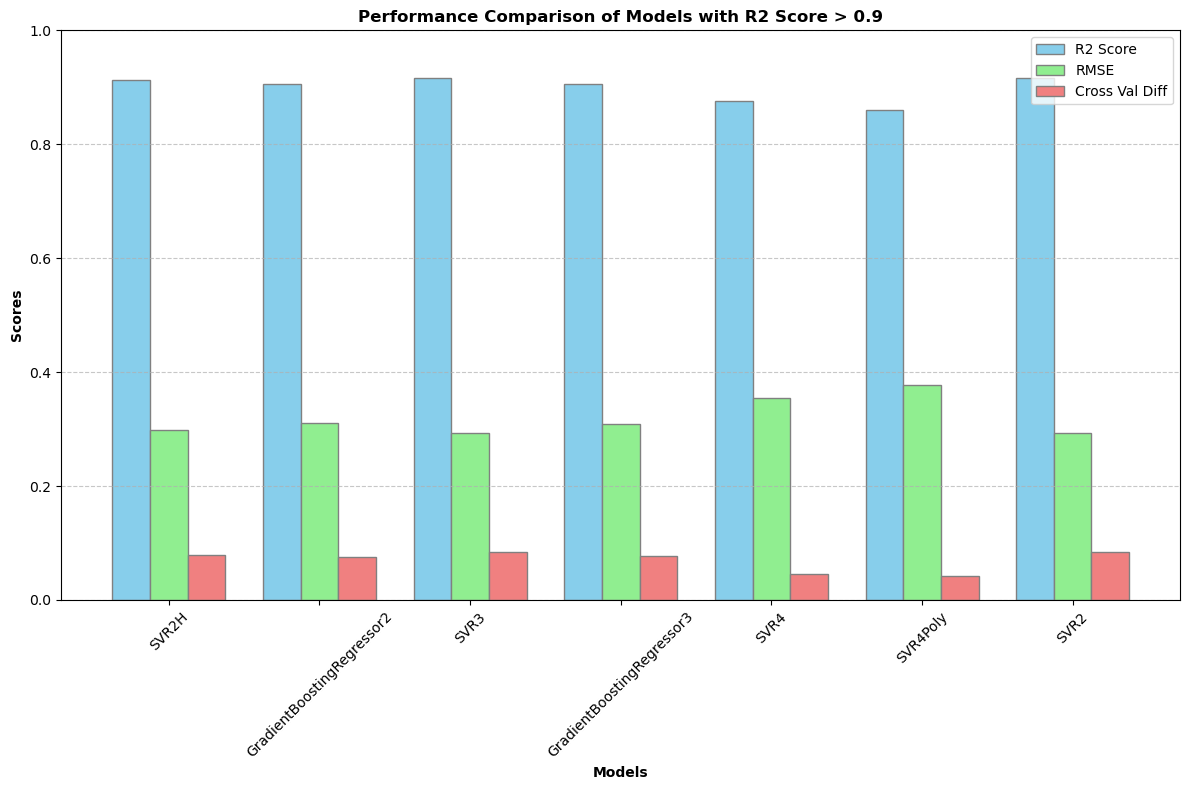

In [275]:
import matplotlib.pyplot as plt
import numpy as np

# Data for models with R2 score above 0.9
models = [
    "SVR2H",
    "GradientBoostingRegressor2",
    "SVR3",
    "GradientBoostingRegressor3",
    "SVR4",
    "SVR4Poly",
    "SVR2"
]
r2_scores = [0.9128, 0.9059, 0.9161, 0.9066, 0.8759, 0.8593, 0.9161]
rmse_values = [0.2986, 0.3102, 0.2928, 0.3090, 0.3552, 0.3782, 0.2928]
cross_val_diffs = [0.0788, 0.0759, 0.0849, 0.0766, 0.0448, 0.0413, 0.0849]

# Number of models
num_models = len(models)

# Positioning for the bars
bar_width = 0.25
r1 = np.arange(num_models)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the grouped bar graph
plt.figure(figsize=(12, 8))

plt.bar(r1, r2_scores, color='skyblue', width=bar_width, edgecolor='grey', label='R2 Score')
plt.bar(r2, rmse_values, color='lightgreen', width=bar_width, edgecolor='grey', label='RMSE')
plt.bar(r3, cross_val_diffs, color='lightcoral', width=bar_width, edgecolor='grey', label='Cross Val Diff')

# Adding labels and title
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(num_models)], models, rotation=45)
plt.ylabel('Scores', fontweight='bold')
plt.title('Performance Comparison of Models with R2 Score > 0.9', fontweight='bold')
plt.ylim(0, 1.0)  # Adjust the y-axis limits based on your data range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


# Observation:
    From the above graph,SVR model has the best accuracy from the scenario:2 and its hypertunned and gives the best result.
       Note: svr2h is the hypertuned label

In [276]:
import joblib

In [277]:
joblib.dump(svr2h,'Medical_cost_Insurance_analysis.pkl')

['Medical_cost_Insurance_analysis.pkl']

In [278]:
model=joblib.load('Medical_cost_Insurance_analysis.pkl')
prediction=model.predict(x2_test)

In [279]:
a=np.array(y2_test)
df=pd.DataFrame()
df['Prediction']=prediction
df['Original']=a
df

,Prediction,Original
0,0.598441,0.452415
1,-1.670818,-1.803246
2,-1.129660,0.373786
3,0.304375,0.909347
4,0.239203,0.108374
...,...,...
397,-0.240905,-0.397880
398,-0.938069,-1.054606
399,-0.163263,-0.330488
400,0.545013,0.444045
